## Bank Personal Load Prediction

This case is about a bank whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('Bank_Personal_Loan.csv')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [3]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# Observing total number of null values present in each feature

df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
categorical_features=['Education','Family','ZIP Code','Securities Account','CD Account', 'Online', 'CreditCard', 'Personal Loan']

for i in categorical_features:
    df[i]=df[i].astype('category')
    
numerical_features = ['Age','Experience','Income','CCAvg','Mortgage']

In [6]:
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

## univariate analysis
### Distribution analysis of numerical variables

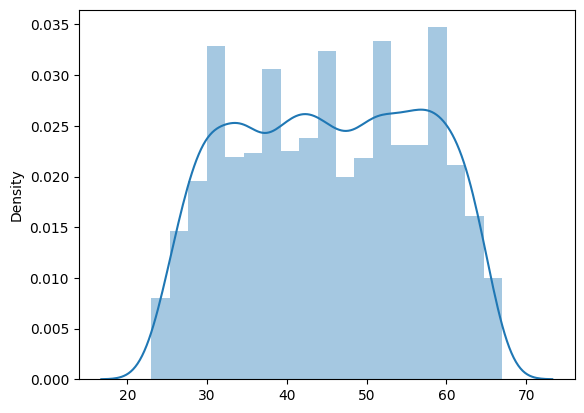

In [7]:
# Age

sns.distplot(x=df["Age"])
plt.show()

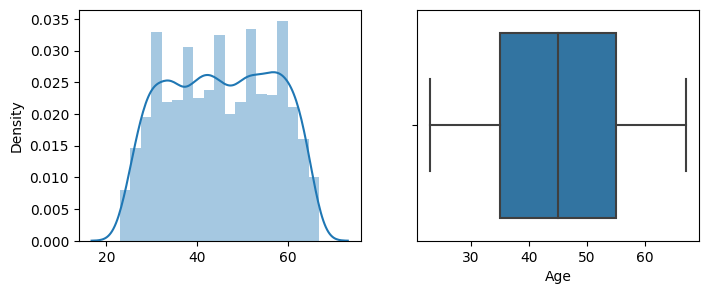

In [8]:
# Age

fig, ax = plt.subplots(1,2,figsize=(8,3))   # 1 row 2 columns
sns.distplot(x = df['Age'], ax = ax[0])
sns.boxplot(x = df['Age'], ax = ax[1])
plt.show()

In [9]:
def dist_box_plot(df,column):
    '''plots distplot and boxplot for input df and column'''
    fig, ax = plt.subplots(1,2,figsize=(8,3))

    sns.distplot(df[column], ax = ax[0])
    sns.boxplot(df[column], ax = ax[1])

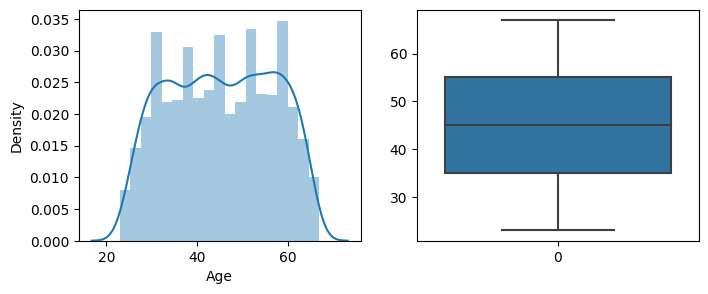

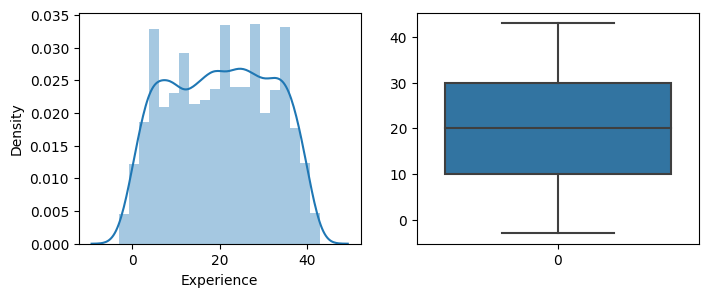

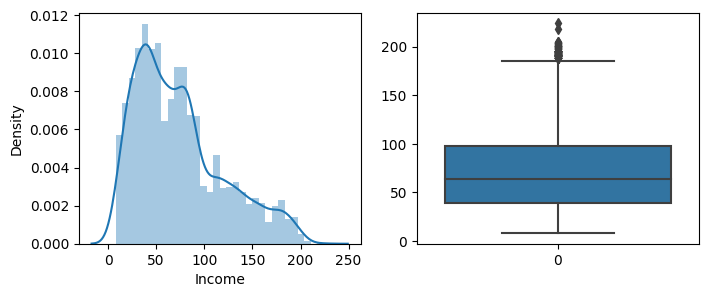

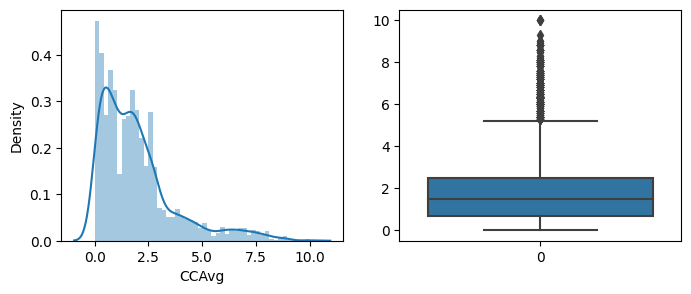

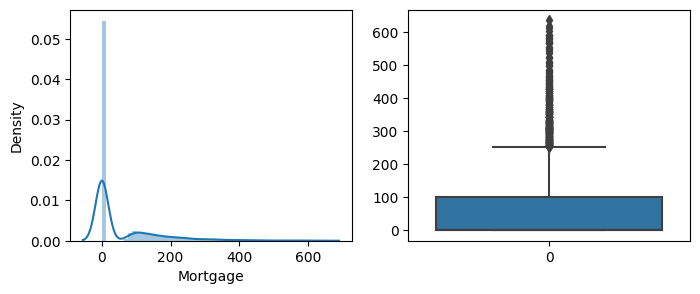

In [10]:
for i in numerical_features:
    dist_box_plot(df,i)

## Distribution of numeriacl variables

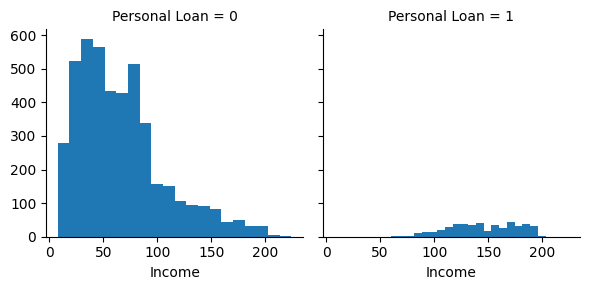

In [11]:
g = sns.FacetGrid(df, col='Personal Loan')
g.map(plt.hist,'Income', bins=20)
plt.show()

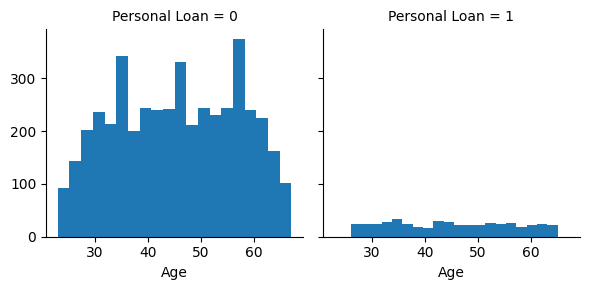

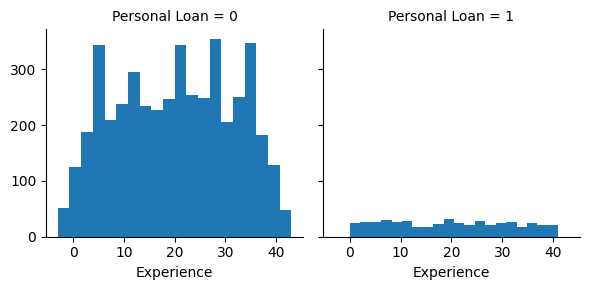

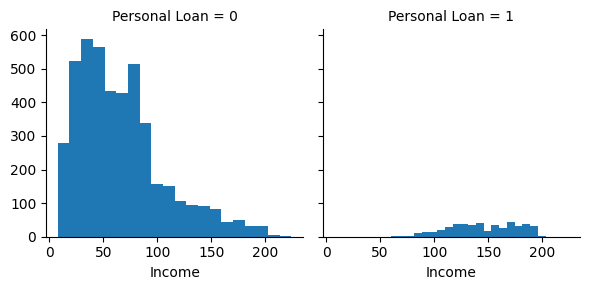

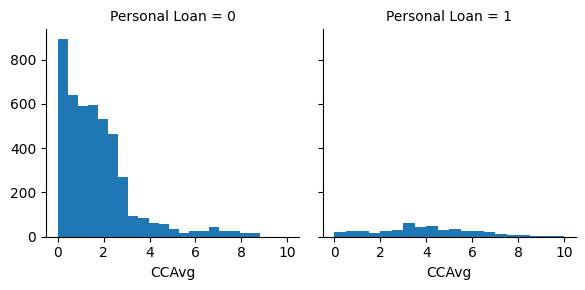

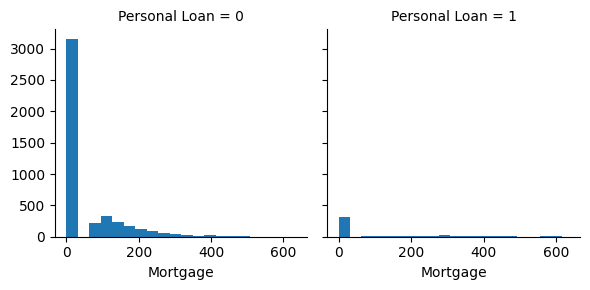

In [12]:
# for all numerical features

def facetgrids(df):
    for i in numerical_features:
        g = sns.FacetGrid(df, col='Personal Loan')
        g.map(plt.hist,i, bins=20)
        plt.show()
facetgrids(df)    

## Distribution of Categorical variables

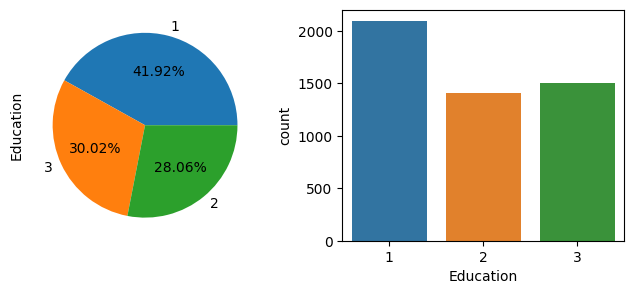

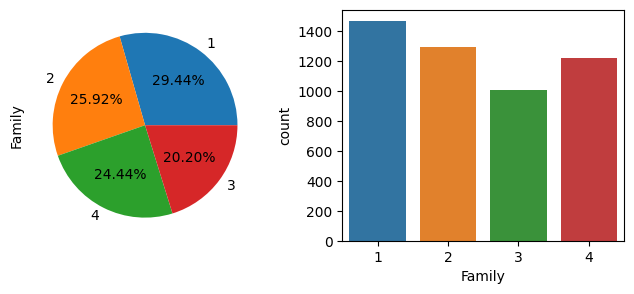

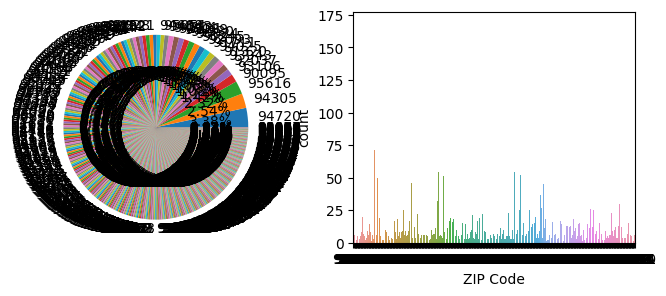

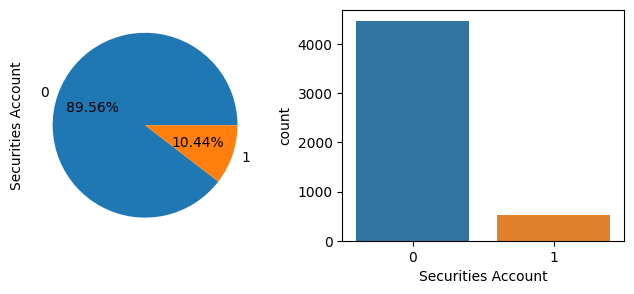

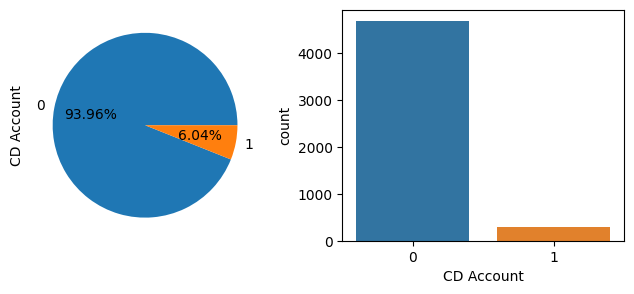

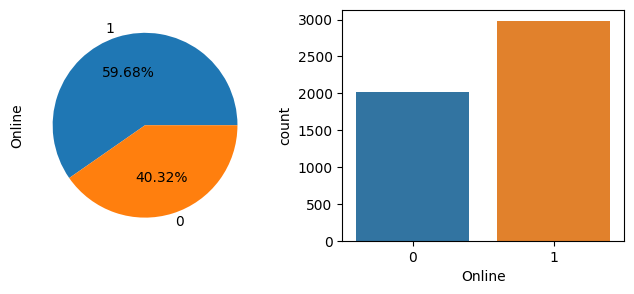

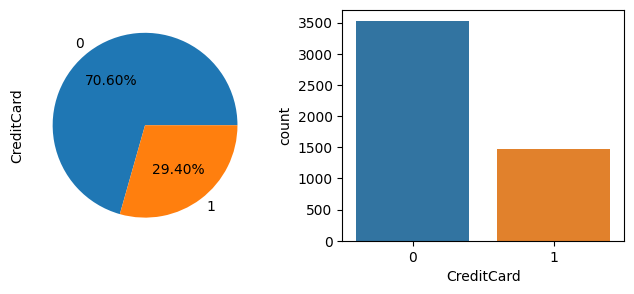

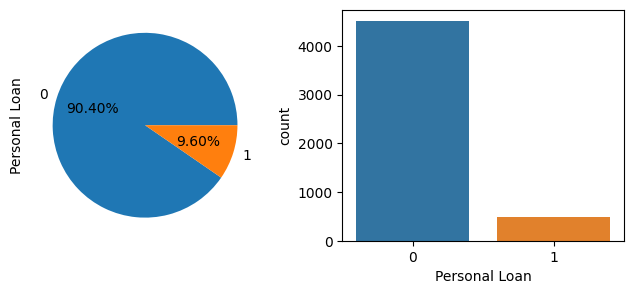

In [13]:
def categorical_dist(df):
    for i in categorical_features:
        fig, ax = plt.subplots(1,2,figsize=(8,3))
        df[i].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
        sns.countplot(x = i,data = df,ax = ax[1])
        # axes[0].set_title('HiddenScore Variable Pie Chart')
        # axes[1].set_title('HiddenScore Variable Bar Graph')
        plt.show()
        
categorical_dist(df)

## Bi Variate Analysis
### Numerical vs Category

In [14]:
numerical_features

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

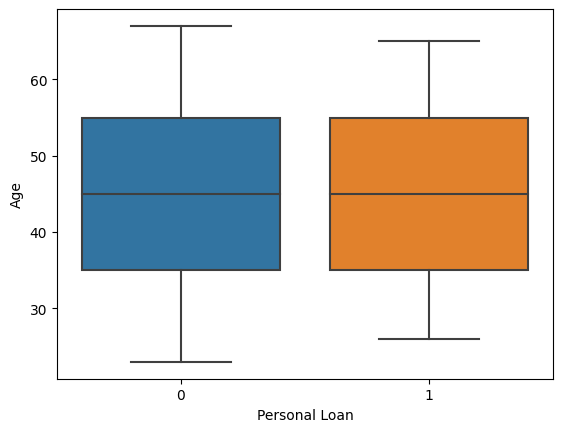

In [15]:
# Personal Loan Vs Age

# figure = plt.figure(figsize=(8,5))

ax = sns.boxplot(x='Personal Loan',y='Age', data = df)
plt.show()

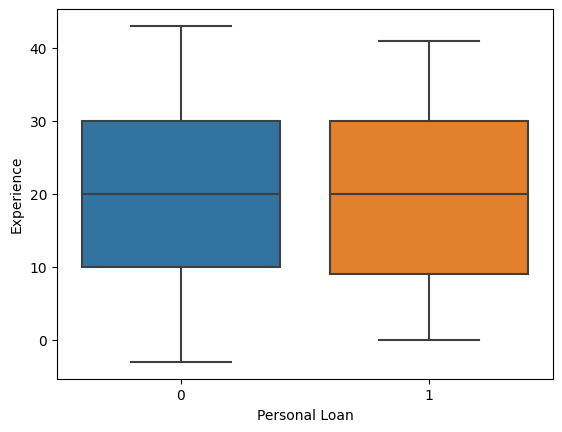

In [16]:
# Personal Loan Vs Experience

sns.boxplot(x = 'Personal Loan', y = 'Experience', data = df)
plt.show()

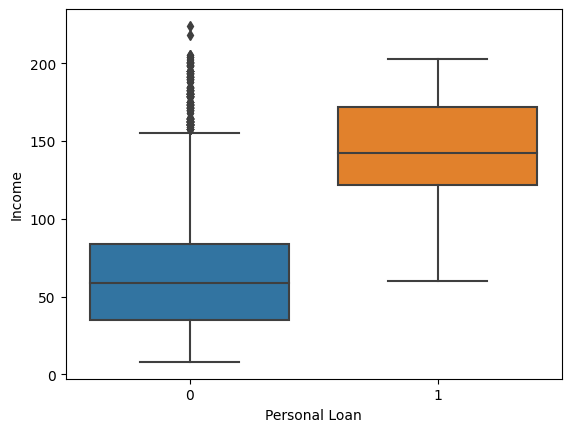

In [17]:
# Personal Loan Vs Income

sns.boxplot(x = 'Personal Loan', y = 'Income', data = df)
plt.show()

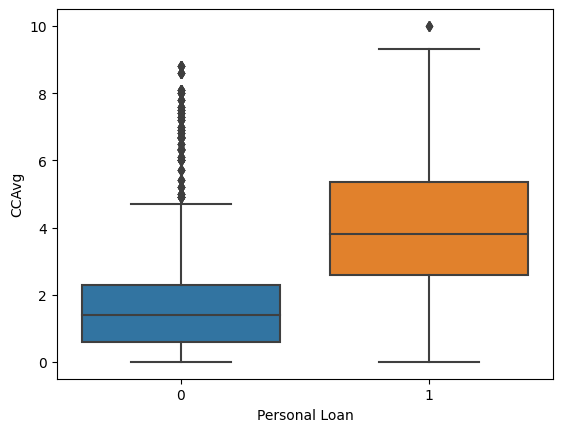

In [18]:
# Personal Loan Vs CCAvg

sns.boxplot(x = 'Personal Loan', y = 'CCAvg', data = df)
plt.show()

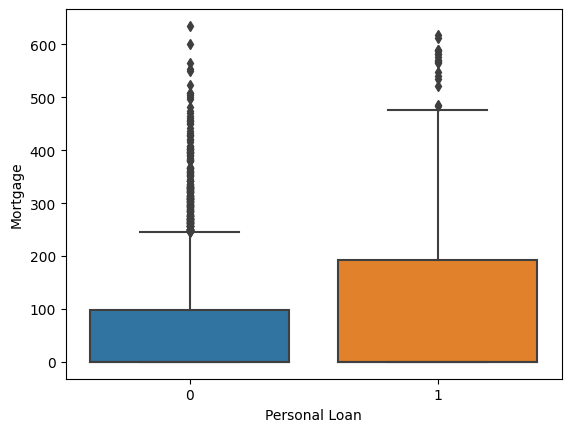

In [19]:
# Personal Loan Vs Mortgage

sns.boxplot(x = 'Personal Loan', y = 'Mortgage', data = df)
plt.show()

In [20]:
numerical_features


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

<Axes: xlabel='Personal Loan'>

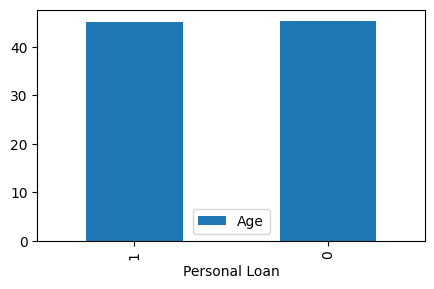

In [21]:
# Personal Loan Vs Age

df.groupby(by=['Personal Loan'])['Age'].mean().reset_index().sort_values(['Age']).plot(x='Personal Loan',y='Age',kind='bar',figsize=(5,3))

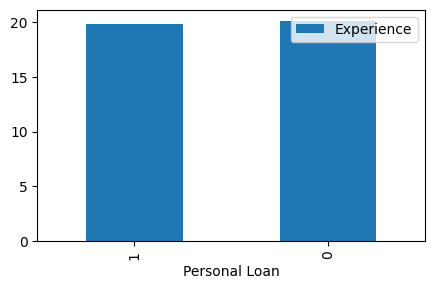

In [22]:
# Personal Loan vs Experience 

df.groupby(by=['Personal Loan'])['Experience'].mean().reset_index().sort_values(['Experience']).plot(x='Personal Loan',y='Experience',kind='bar',figsize=(5,3))
plt.show()

<Axes: xlabel='Personal Loan'>

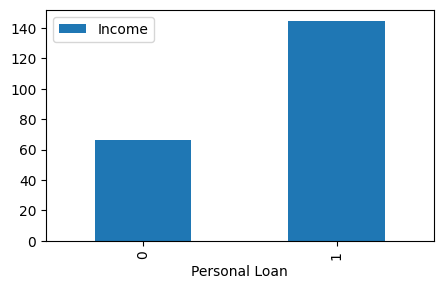

In [23]:
# personal loan vs income

df.groupby(by='Personal Loan')['Income'].mean().reset_index().plot(x='Personal Loan',y='Income',kind='bar',figsize=(5,3))

<Axes: xlabel='Personal Loan'>

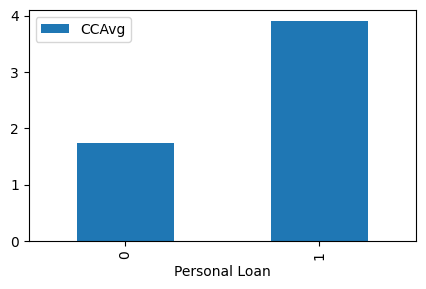

In [24]:
# Personal Loan Vs CCAvg

df.groupby(by=['Personal Loan'])['CCAvg'].mean().reset_index().sort_values(['CCAvg']).plot(x='Personal Loan',y='CCAvg',kind='bar',figsize=(5,3))

<Axes: xlabel='Personal Loan'>

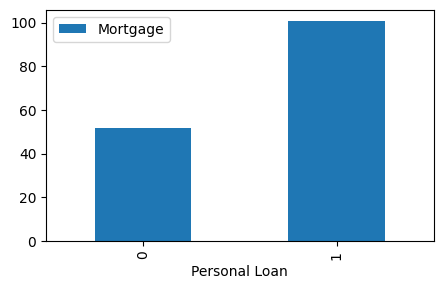

In [25]:
# personal Loan vs mortgage

df.groupby(by=['Personal Loan'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).plot(x='Personal Loan',y='Mortgage',kind='bar',figsize=(5,3))

## Bivariate analysis

In [26]:
numerical_features

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

<Axes: xlabel='Personal Loan'>

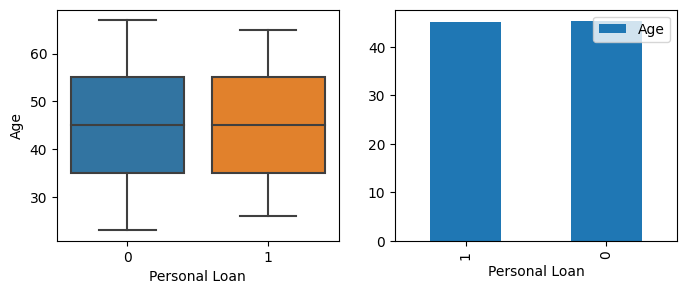

In [27]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
sns.boxplot(x=df['Personal Loan'],y=df['Age'],data=df,ax=ax[0])
df.groupby(['Personal Loan'])['Age'].mean().reset_index().sort_values(['Age']).plot(x='Personal Loan',y='Age',kind='bar',ax=ax[1])

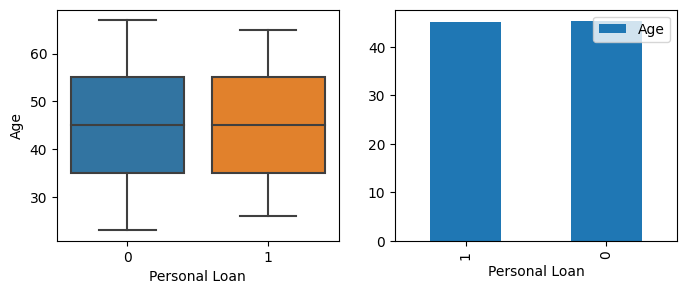

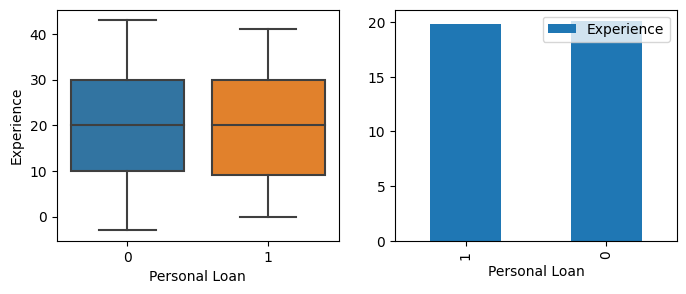

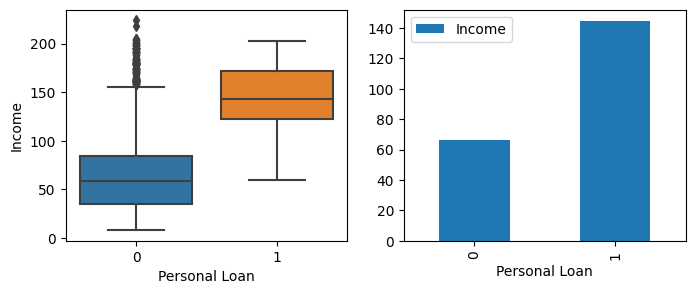

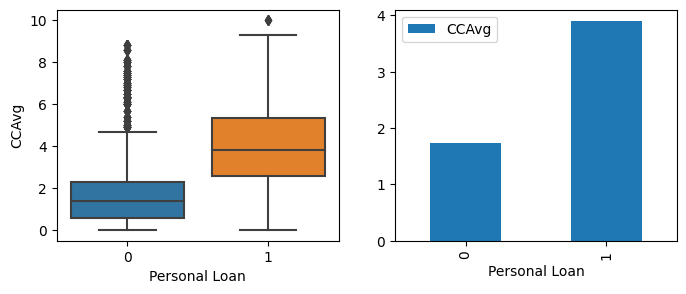

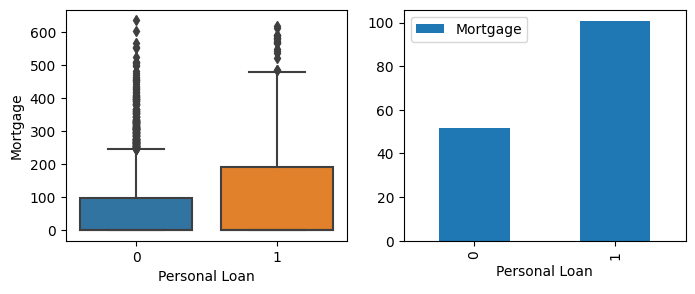

In [28]:
# bivariate analysis of numerical features

def bivariate_analysis(df,y_var):
    for i in numerical_features:
        fig, ax = plt.subplots(1,2,figsize=(8,3))
        sns.boxplot(x=df[y_var],y=df[i],data=df,ax=ax[0])
        df.groupby([y_var])[i].mean().reset_index().sort_values([i]).plot(x=y_var,y=i,kind='bar',ax=ax[1])
        plt.show()

bivariate_analysis(df,'Personal Loan')

##  Bivariate analysis
# Numerical vs Numerical


<Axes: xlabel='CCAvg', ylabel='Age'>

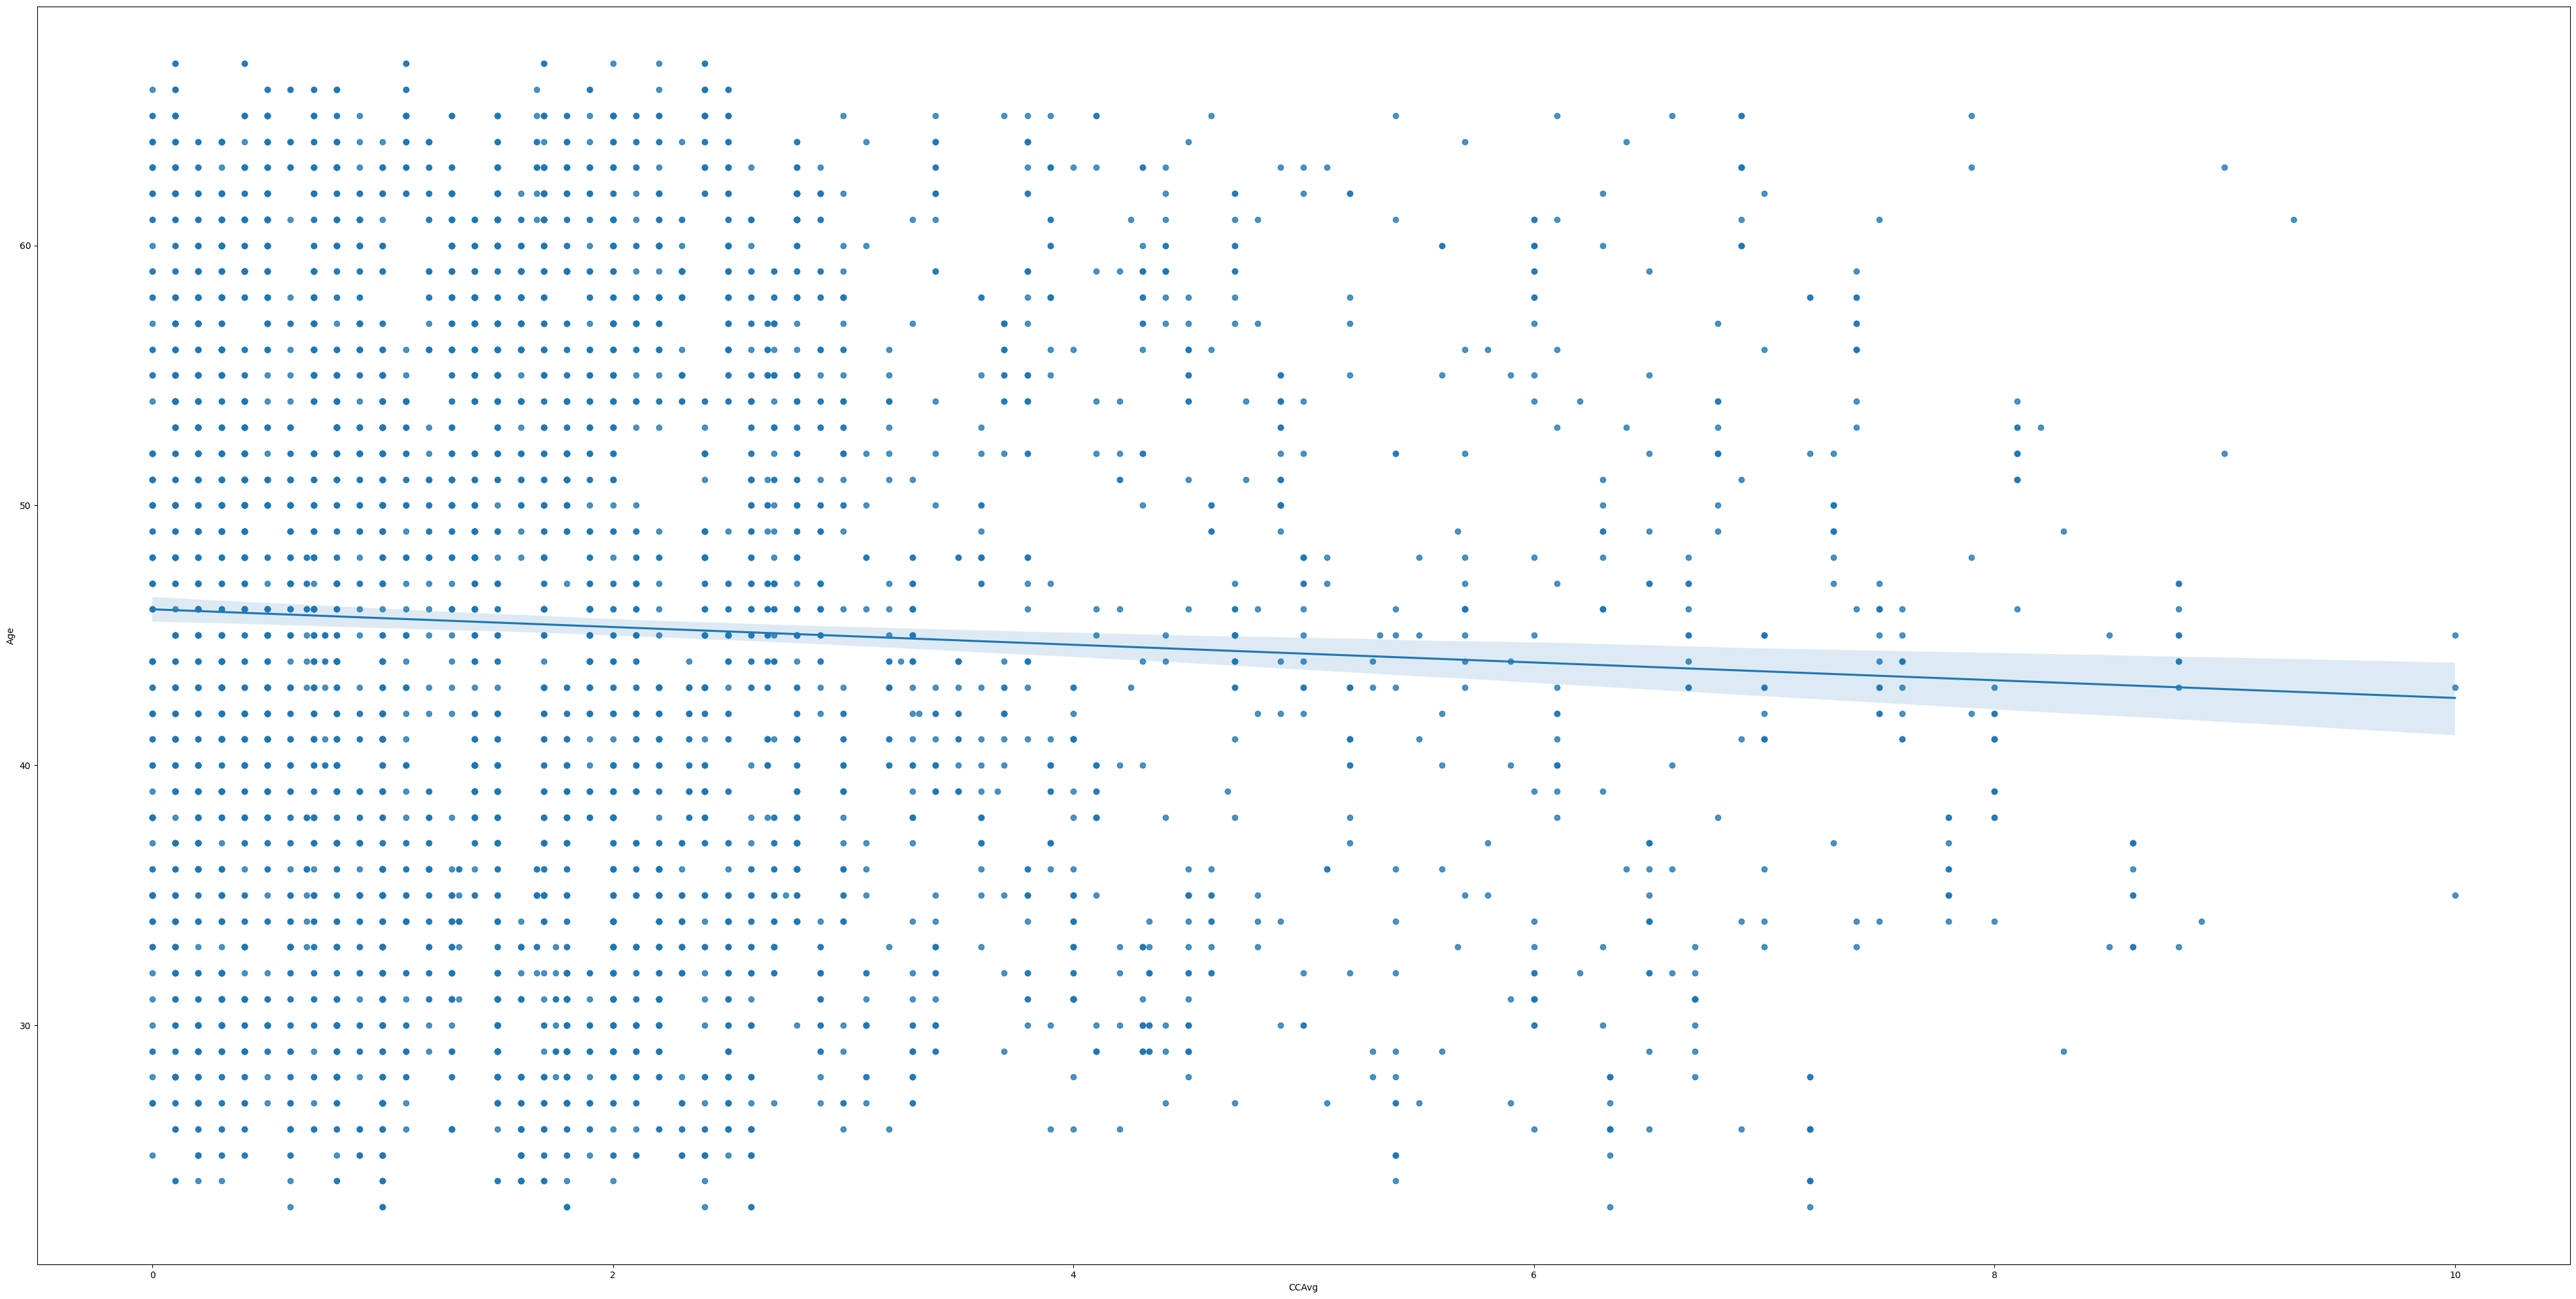

In [29]:
figure = plt.figure(figsize=(50,25))
sns.regplot(x=df['CCAvg'],y=df['Age'],data=df)
# Age does not have any relationship with spend.

<Axes: xlabel='CCAvg', ylabel='Income'>

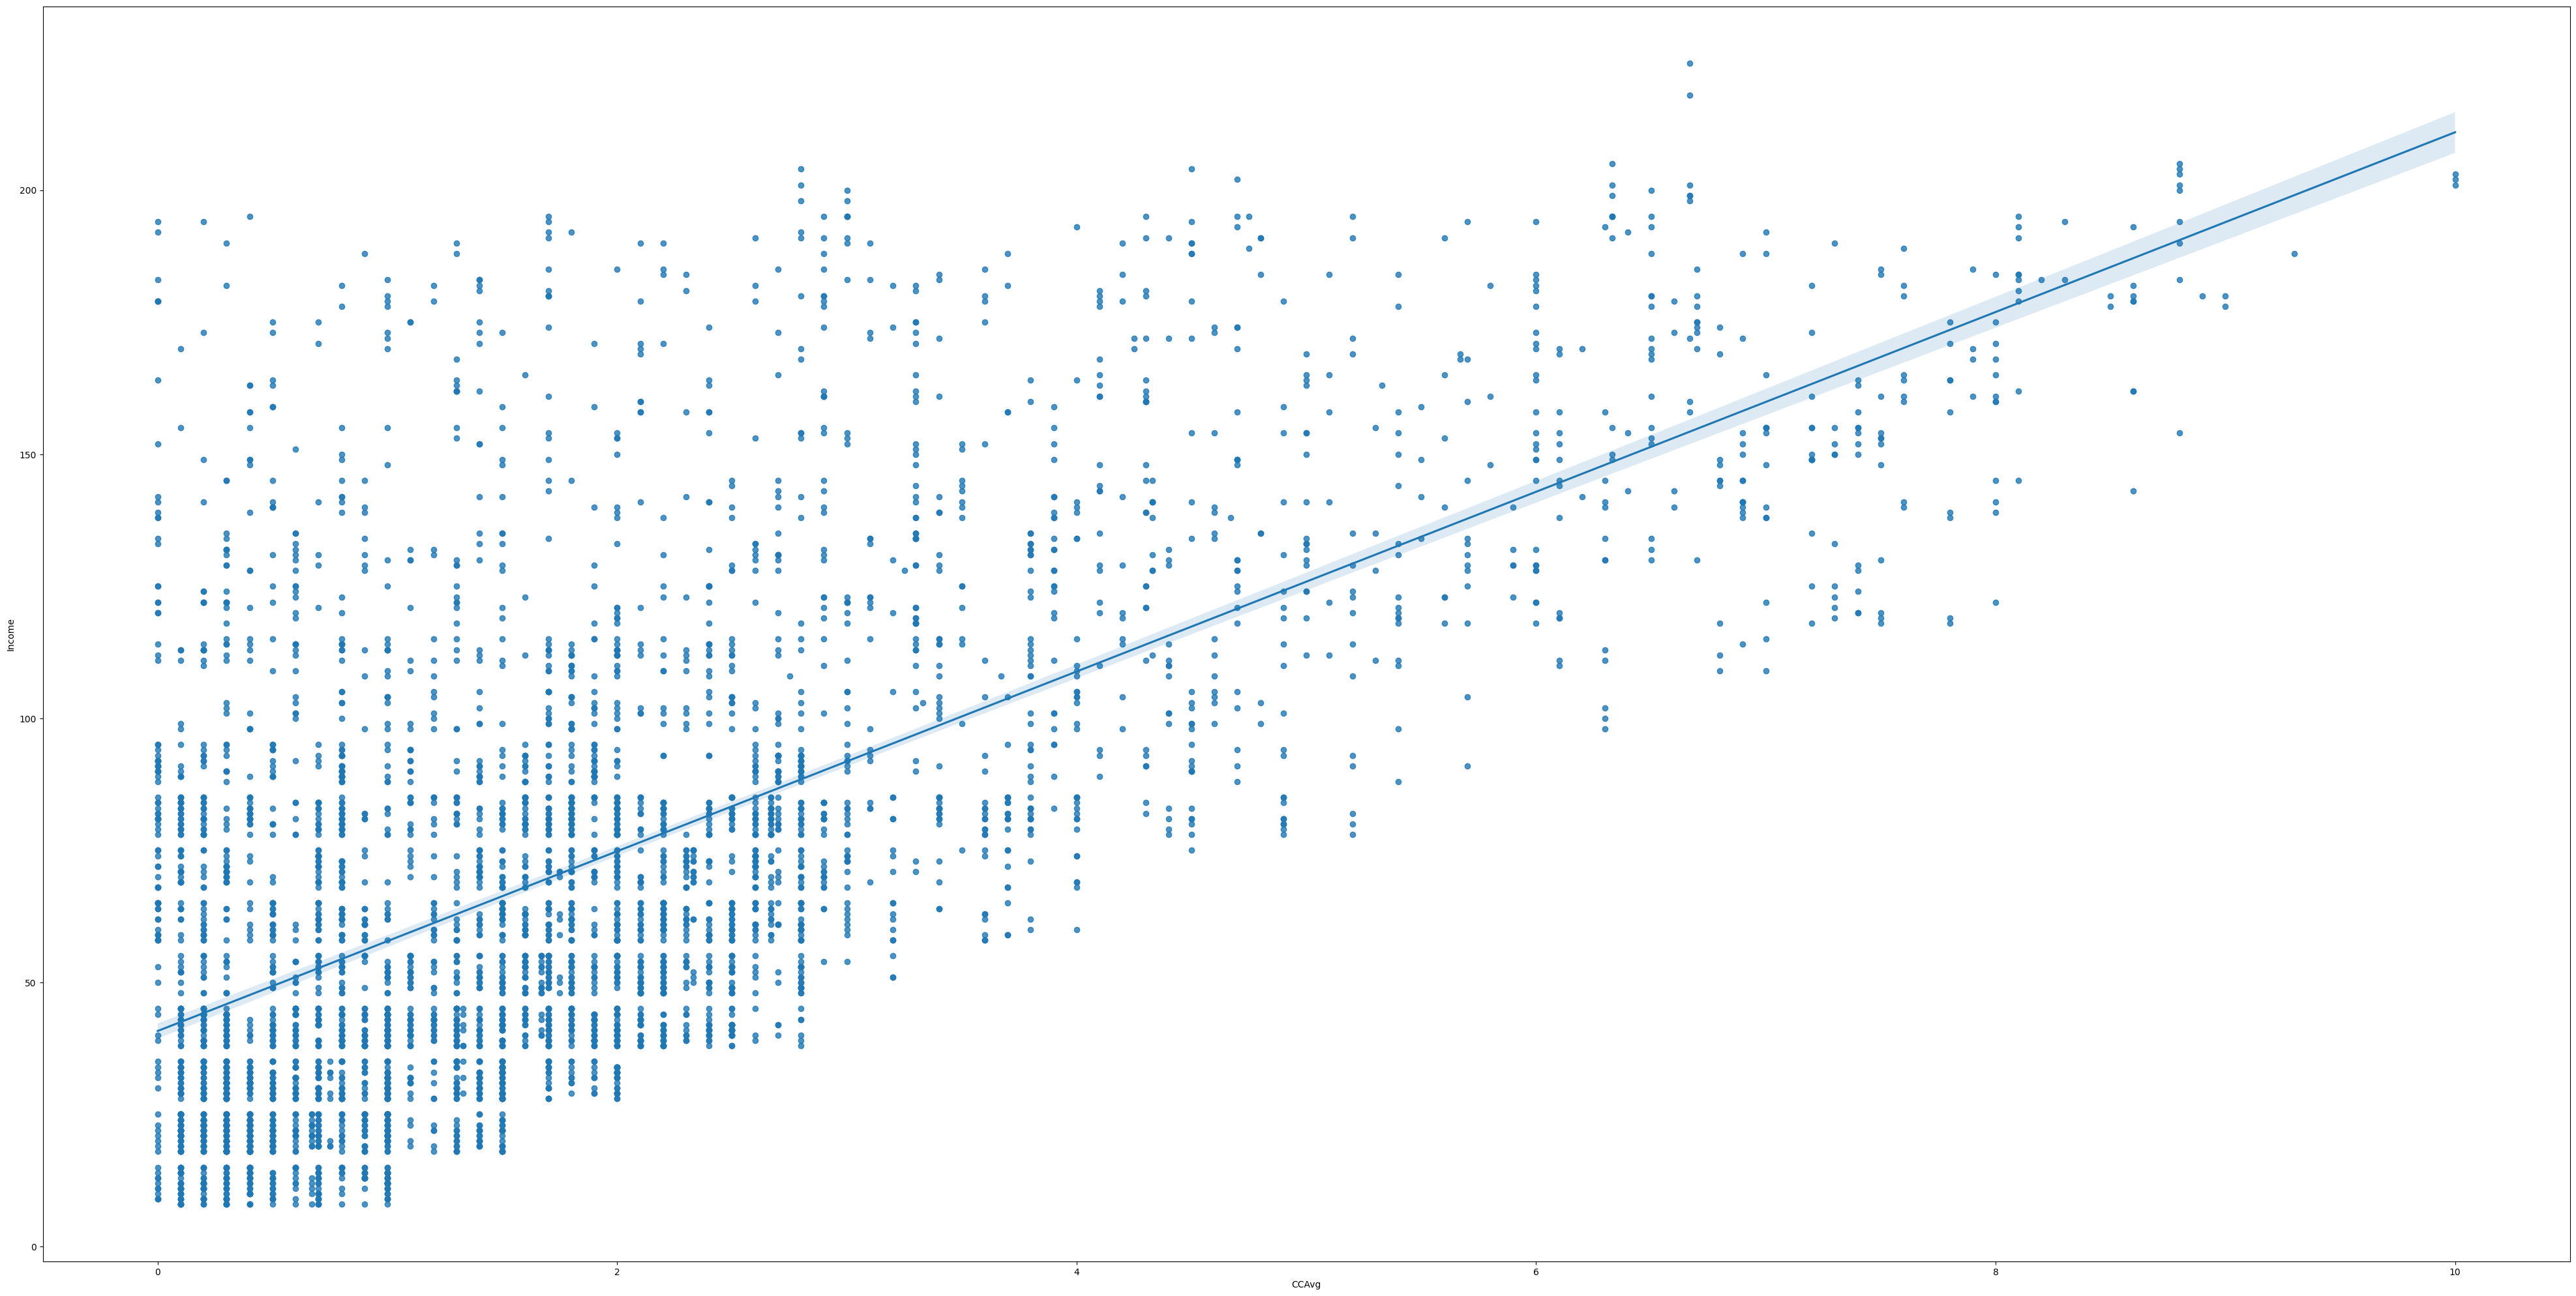

In [30]:
figure = plt.figure(figsize=(50,25))
sns.regplot(x=df['CCAvg'],y=df['Income'],data=df)
#There is clear linear relationship between Monthly average spend and income.

<Axes: xlabel='CCAvg', ylabel='Mortgage'>

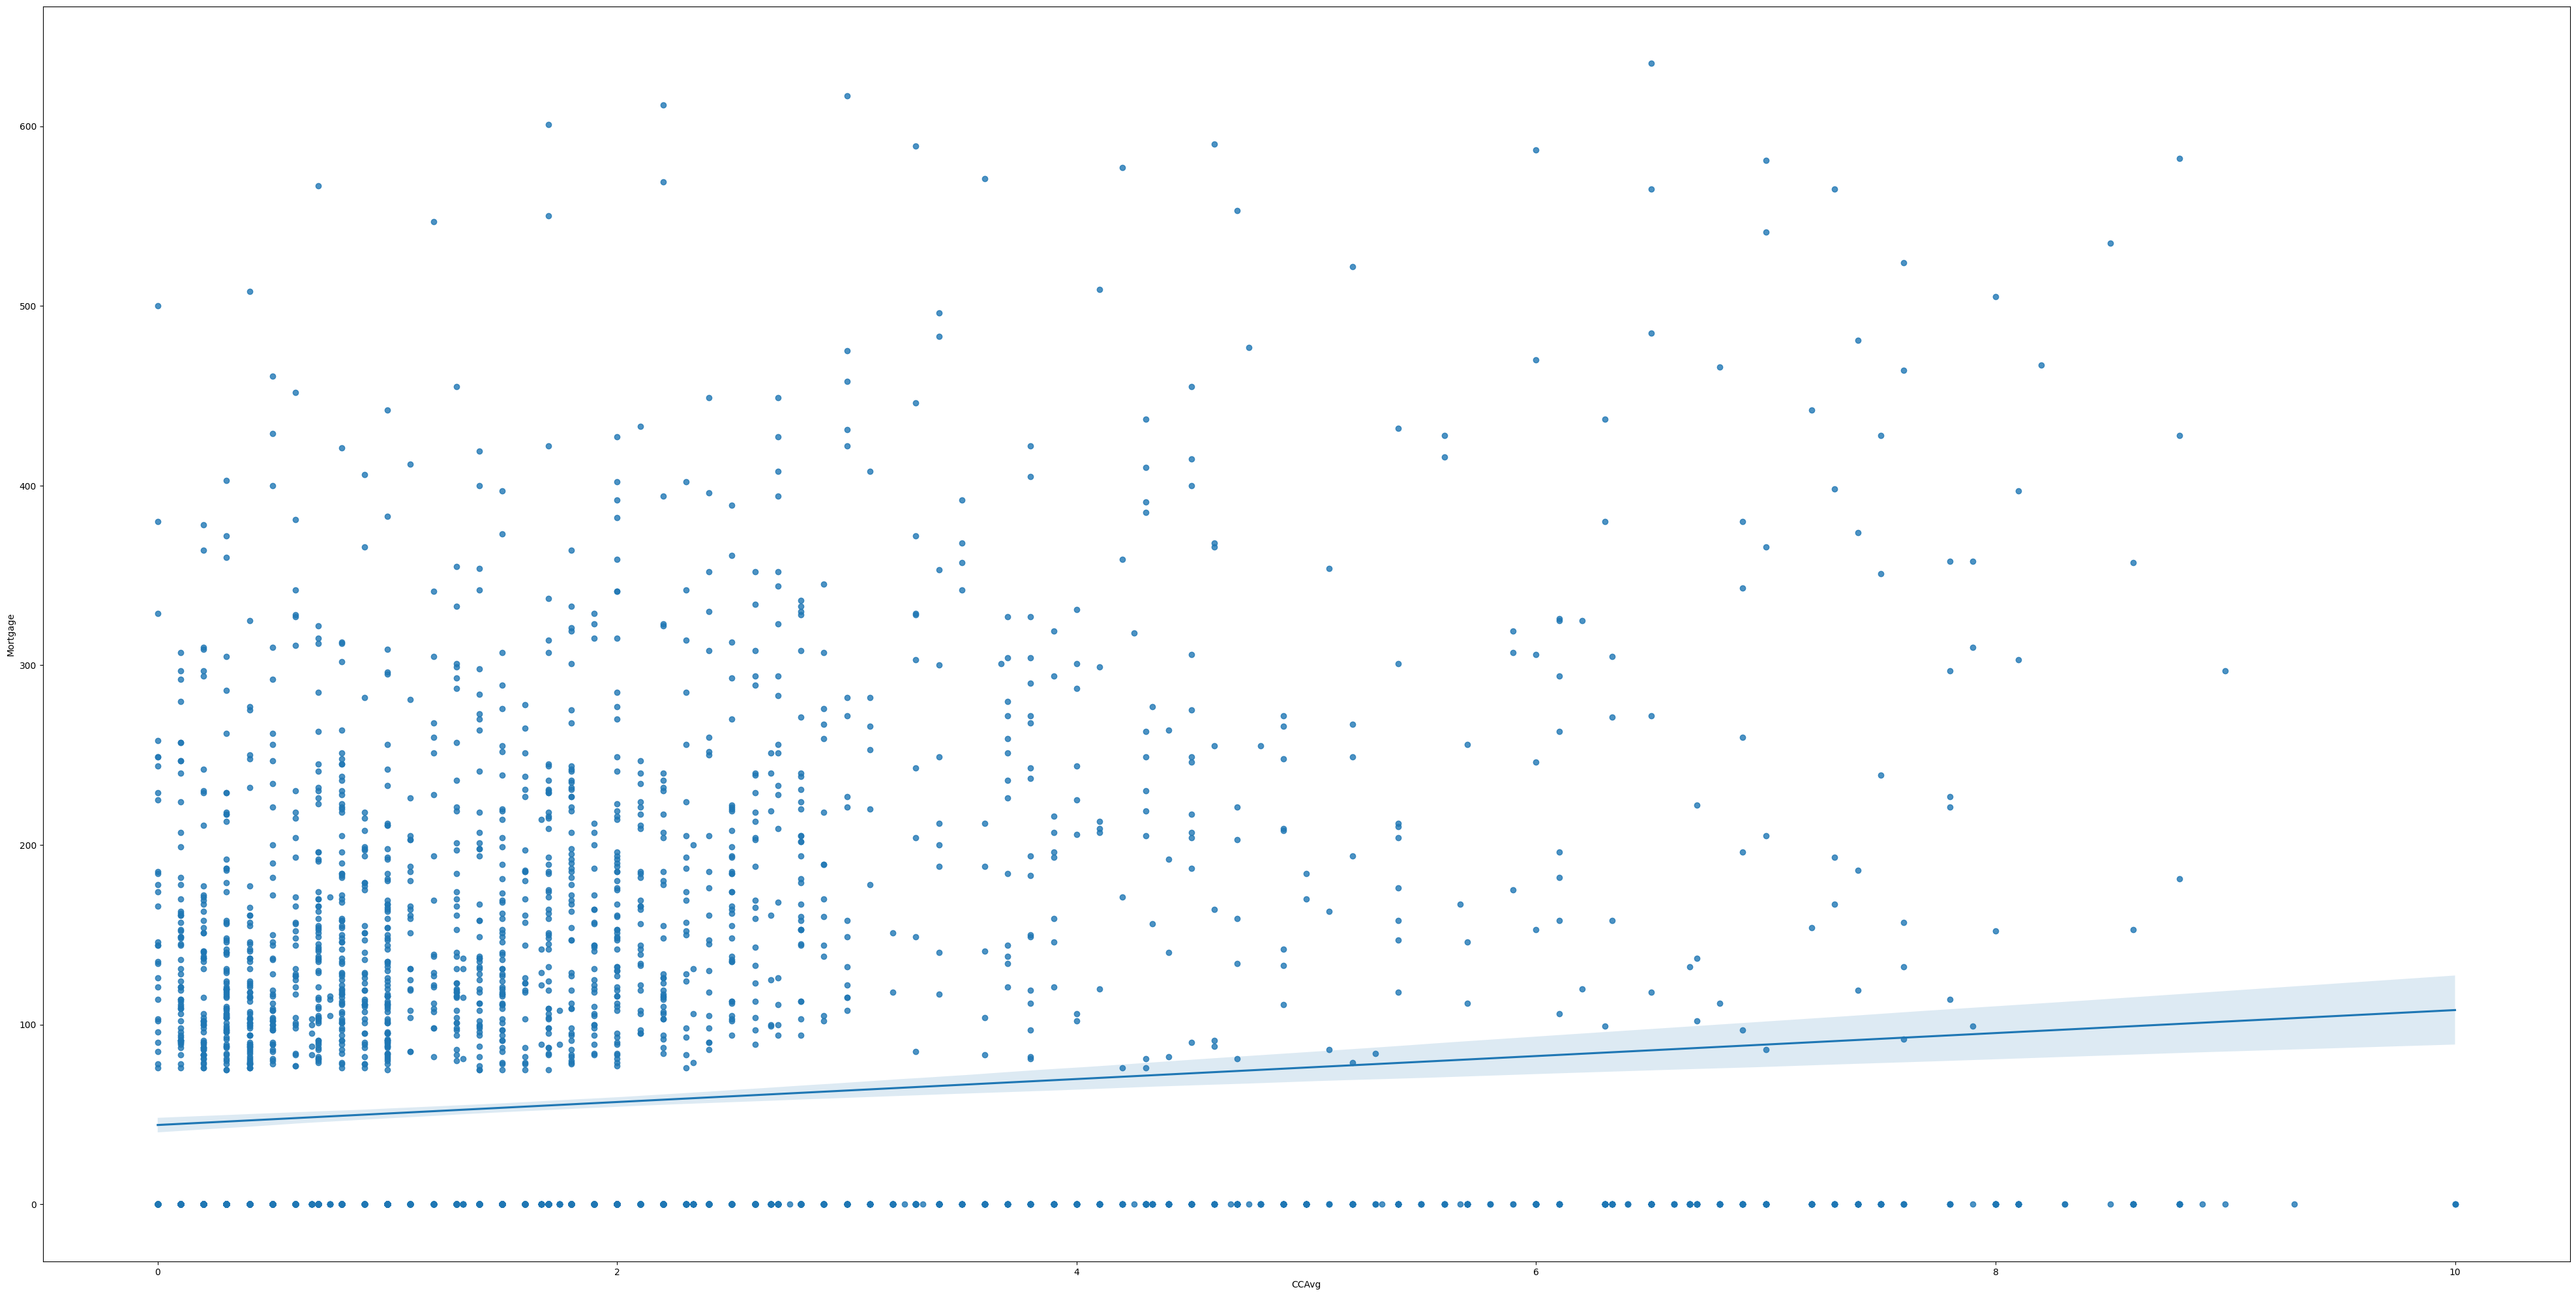

In [31]:
figure = plt.figure(figsize=(50,25))
sns.regplot(x=df['CCAvg'],y=df['Mortgage'],data=df)
# Mortgage value has slight relationship with spend

<Axes: xlabel='CCAvg', ylabel='Experience'>

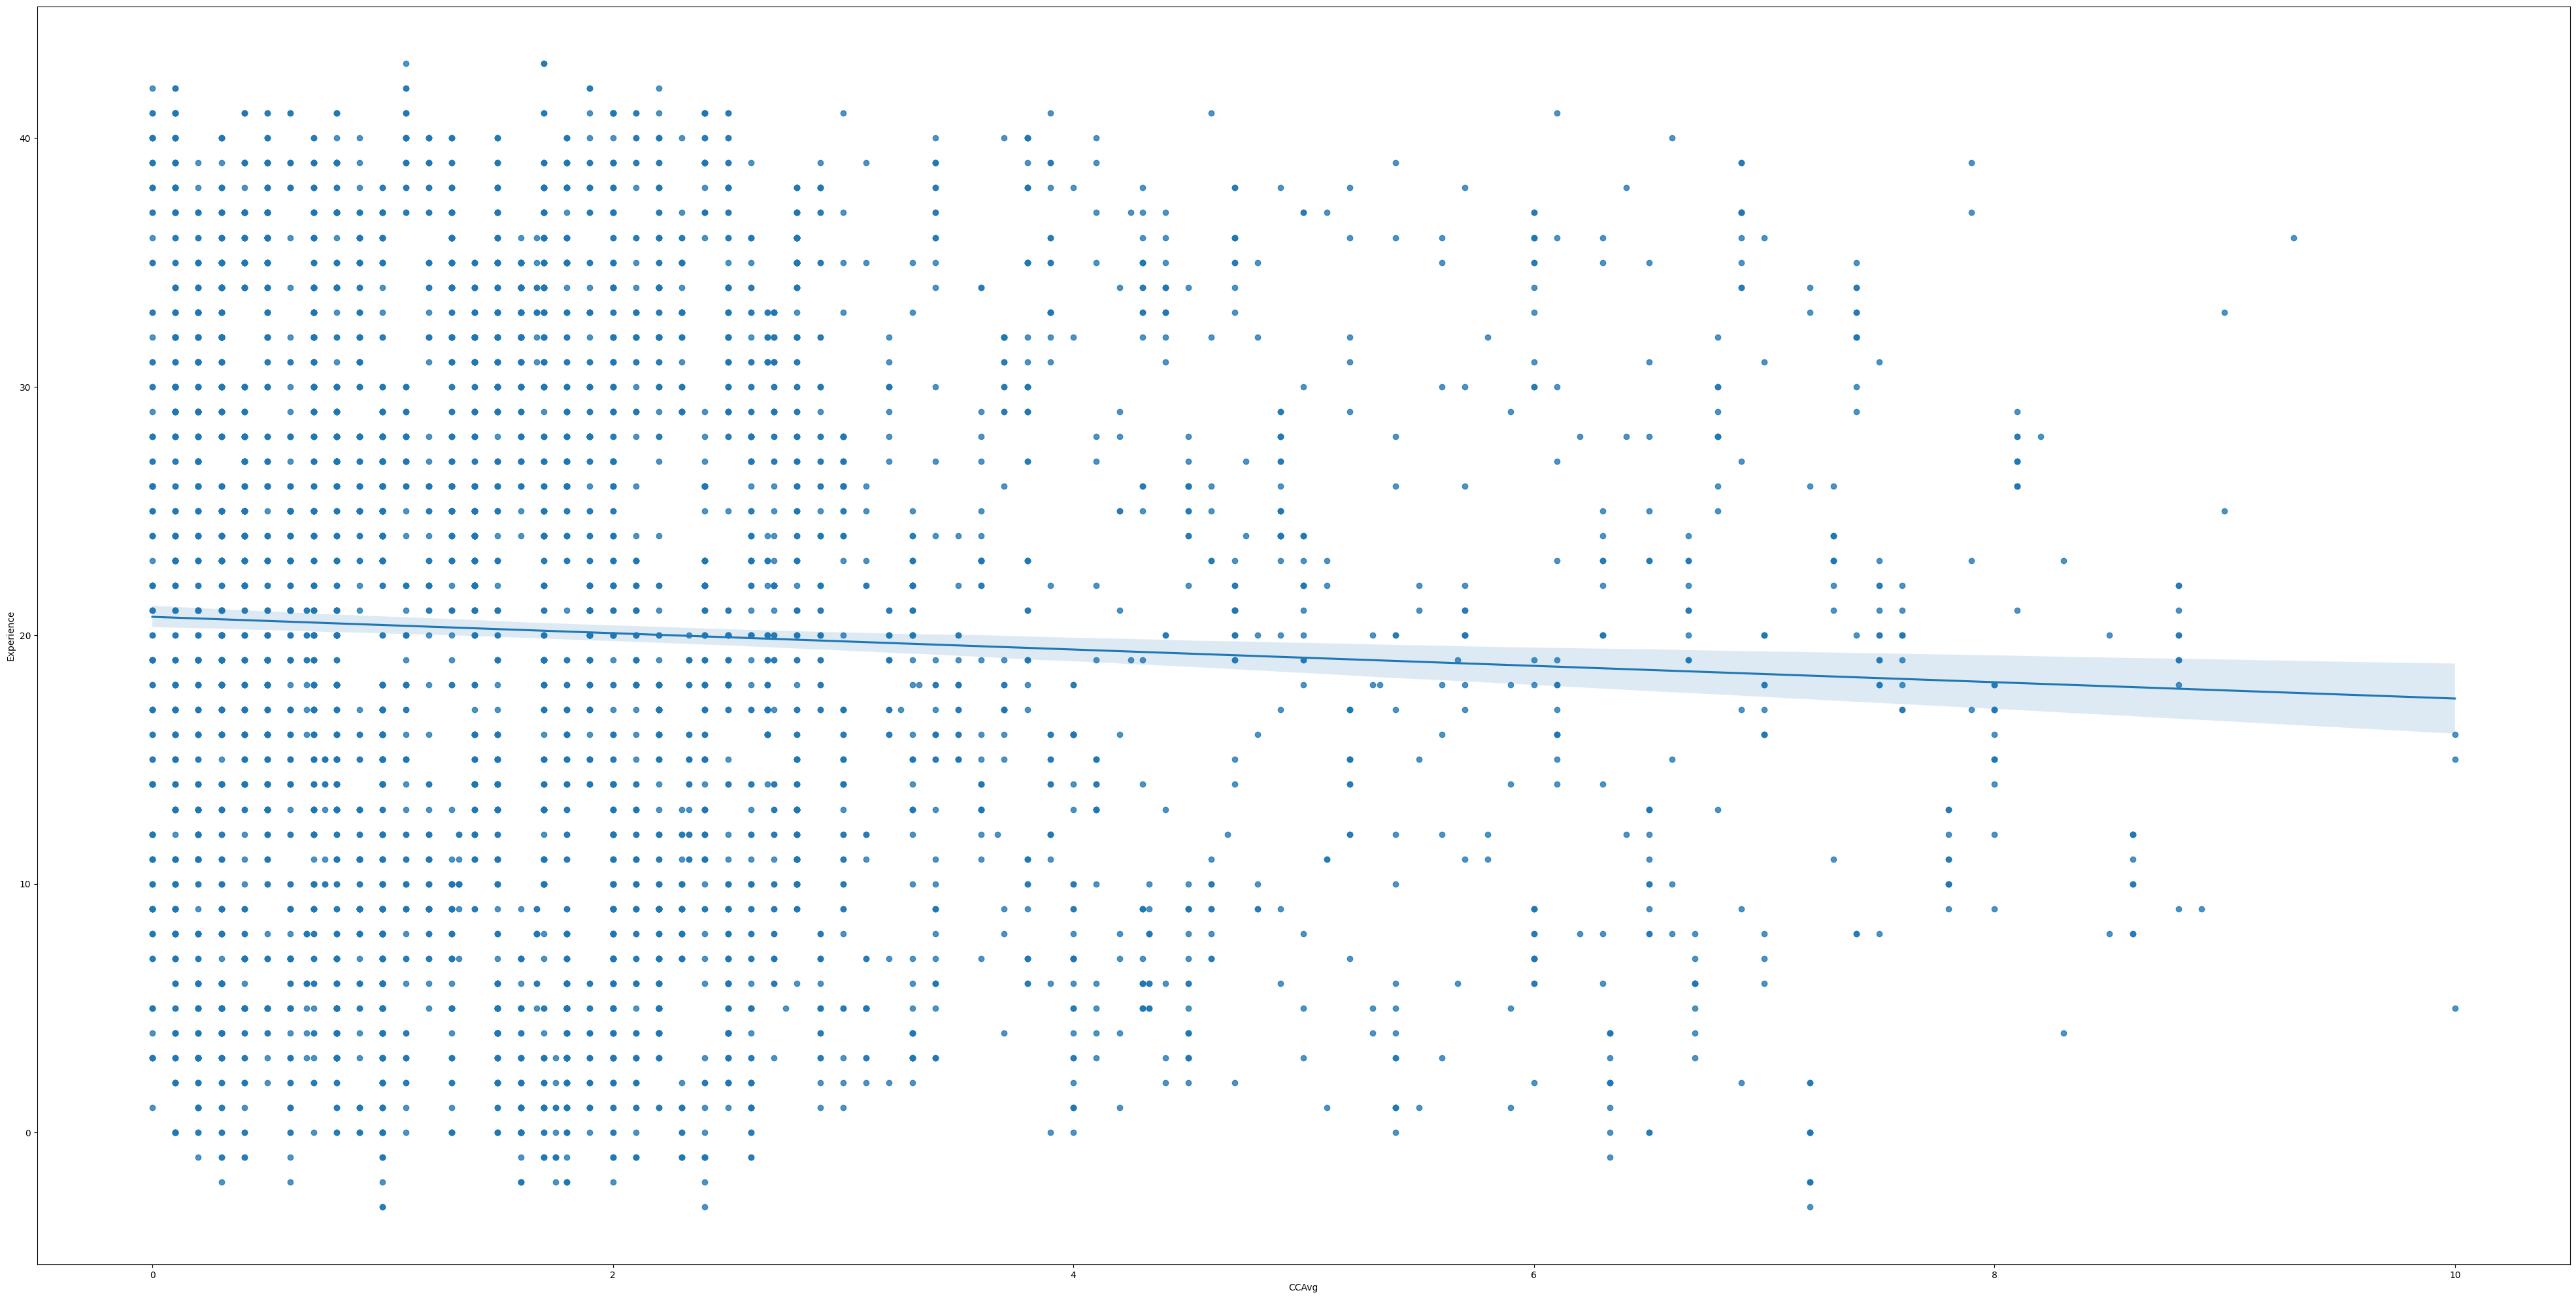

In [32]:
figure = plt.figure(figsize=(50,25))
sns.regplot(x=df['CCAvg'],y=df['Experience'],data=df)
# Customer period is not dependent on spend

# Correlation among pairs of continuous variables

In [33]:
df.corr()

ID       Age  Experience    Income     CCAvg  Mortgage
ID          1.000000 -0.008473   -0.008326 -0.017695 -0.024675 -0.013920
Age        -0.008473  1.000000    0.994215 -0.055269 -0.052012 -0.012539
Experience -0.008326  0.994215    1.000000 -0.046574 -0.050077 -0.010582
Income     -0.017695 -0.055269   -0.046574  1.000000  0.645984  0.206806
CCAvg      -0.024675 -0.052012   -0.050077  0.645984  1.000000  0.109905
Mortgage   -0.013920 -0.012539   -0.010582  0.206806  0.109905  1.000000

In [34]:
df

ID  Age  Experience  Income ZIP Code Family  CCAvg Education  \
0        1   25           1      49    91107      4    1.6         1   
1        2   45          19      34    90089      3    1.5         1   
2        3   39          15      11    94720      1    1.0         1   
3        4   35           9     100    94112      1    2.7         2   
4        5   35           8      45    91330      4    1.0         2   
...    ...  ...         ...     ...      ...    ...    ...       ...   
4995  4996   29           3      40    92697      1    1.9         3   
4996  4997   30           4      15    92037      4    0.4         1   
4997  4998   63          39      24    93023      2    0.3         3   
4998  4999   65          40      49    90034      3    0.5         2   
4999  5000   28           4      83    92612      3    0.8         1   

      Mortgage Personal Loan Securities Account CD Account Online CreditCard  
0            0             0                  1          0      0          0  
1            0             0                  1          0      0          0  
2            0             0                  0          0      0          0  
3            0             0                  0          0      0          0  
4            0             0                  0          0      0          1  
...        ...           ...                ...        ...    ...        ...  
4995         0             0                  0          0      1          0  
4996        85             0                  0          0      1          0  
4997         0             0                  0          0      0          0  
4998         0             0                  0          0      1          0  
4999         0             0                  0          0      1          1  

[5000 rows x 14 columns]

<Axes: >

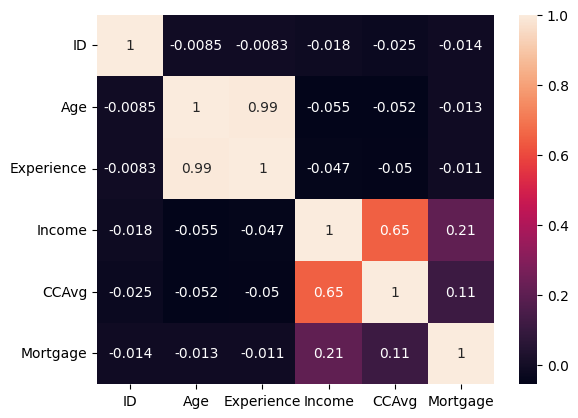

In [35]:
sns.heatmap(df.corr(),annot=True)

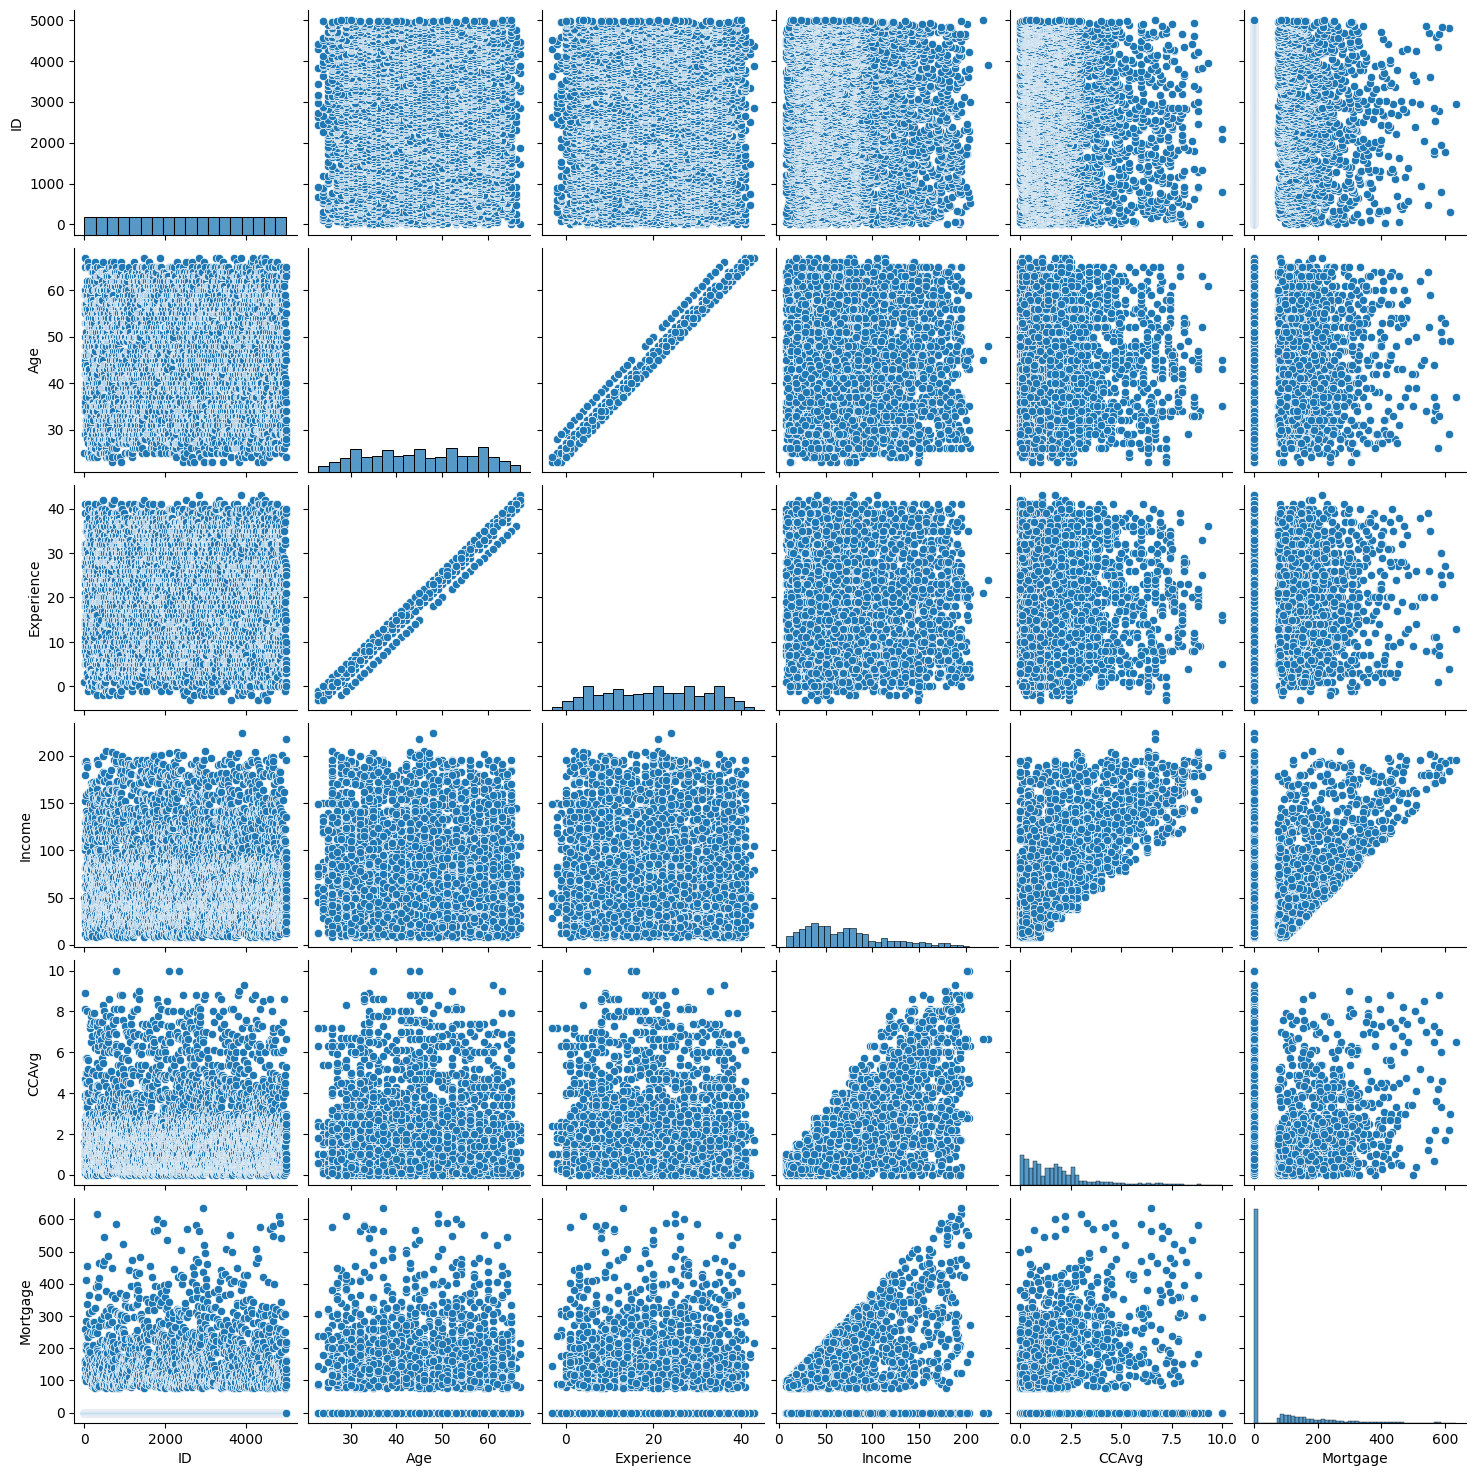

In [36]:
sns.pairplot(df)

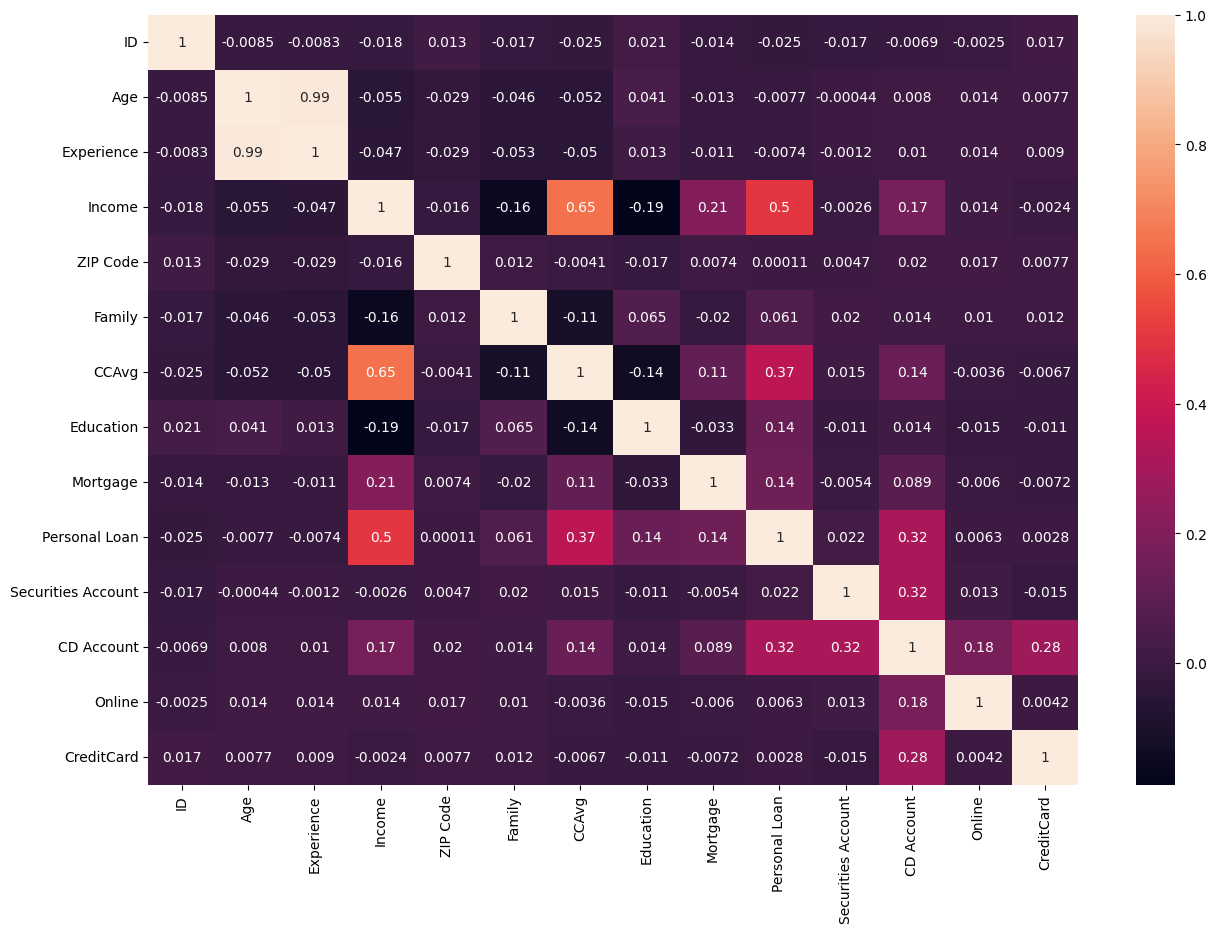

In [37]:

df = df.apply(pd.to_numeric) 
figure = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Category vs Category

In [38]:
categorical_features

['Education',
 'Family',
 'ZIP Code',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Personal Loan']

<Axes: xlabel='Education', ylabel='count'>

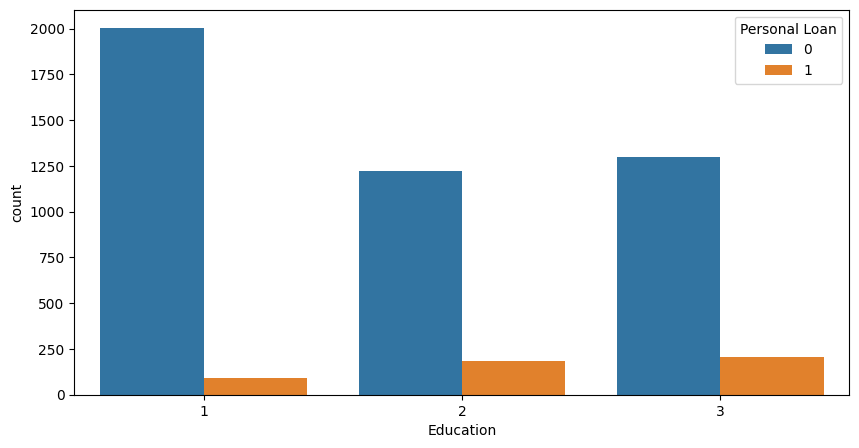

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Education'],hue= df['Personal Loan'], data = df)

<Axes: xlabel='Family', ylabel='count'>

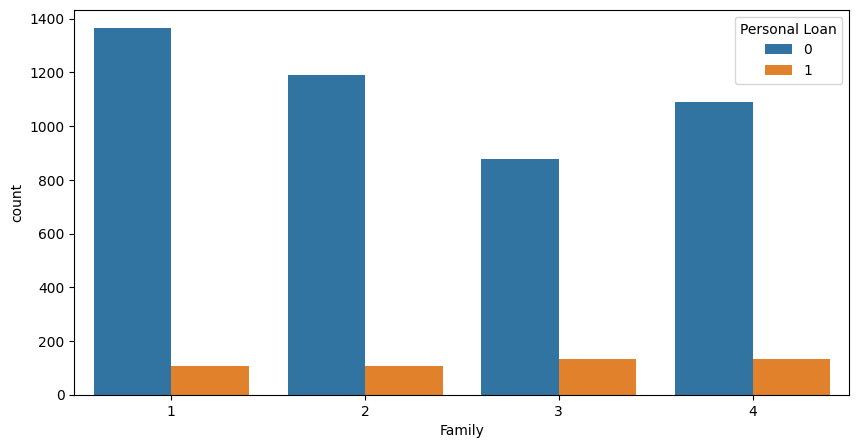

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Family'],hue=df['Personal Loan'])

<Axes: xlabel='Securities Account', ylabel='count'>

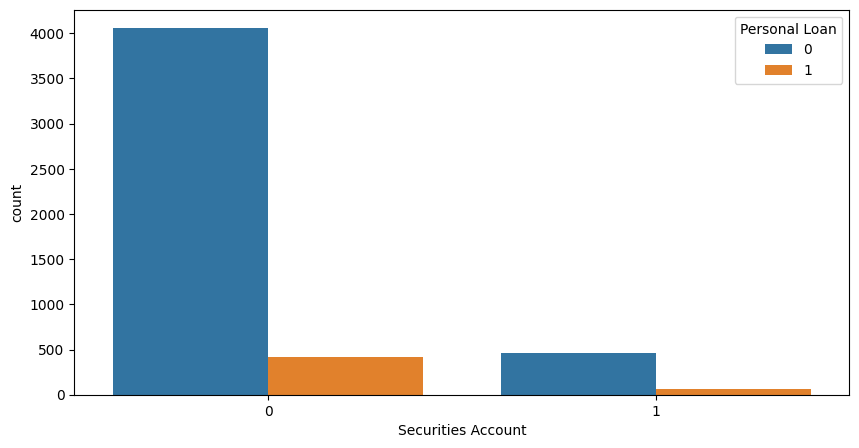

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Securities Account'],hue=df['Personal Loan'])

<Axes: xlabel='CD Account', ylabel='count'>

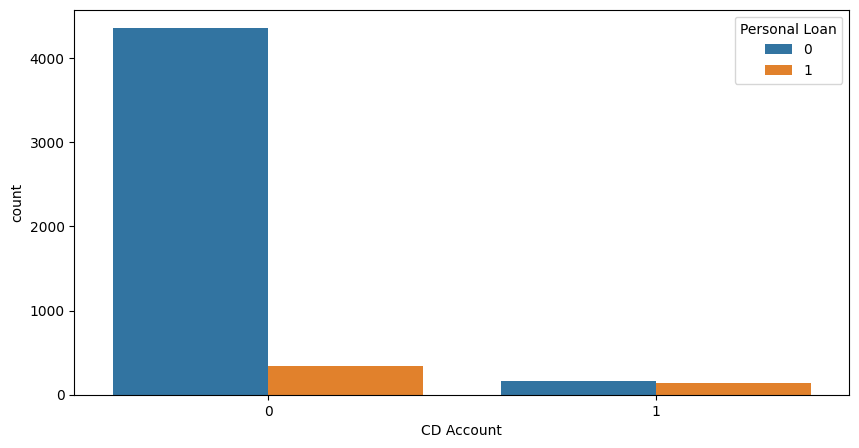

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['CD Account'],hue=df['Personal Loan'])

<Axes: xlabel='Online', ylabel='count'>

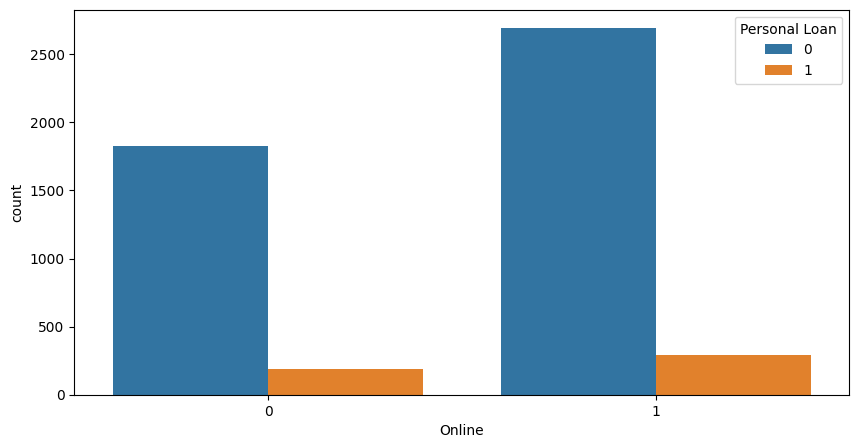

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['Online'],hue=df['Personal Loan'])

<Axes: xlabel='CreditCard', ylabel='count'>

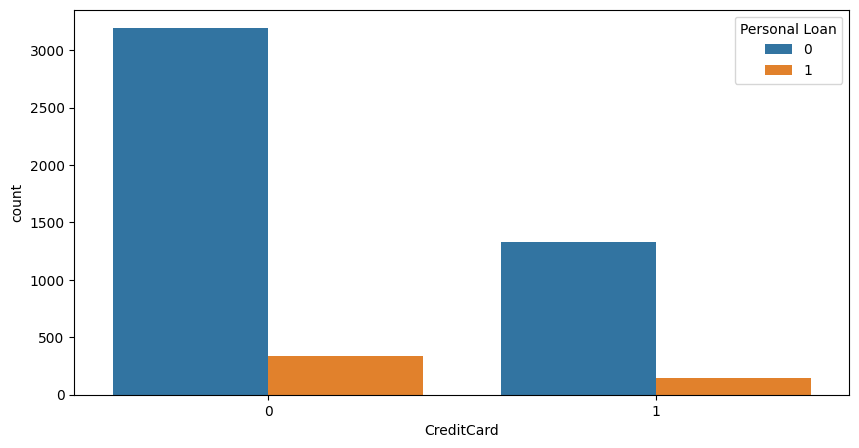

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['CreditCard'],hue=df['Personal Loan'])

# MultiVariate Analysis categorical var

In [45]:
categorical_features

['Education',
 'Family',
 'ZIP Code',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Personal Loan']

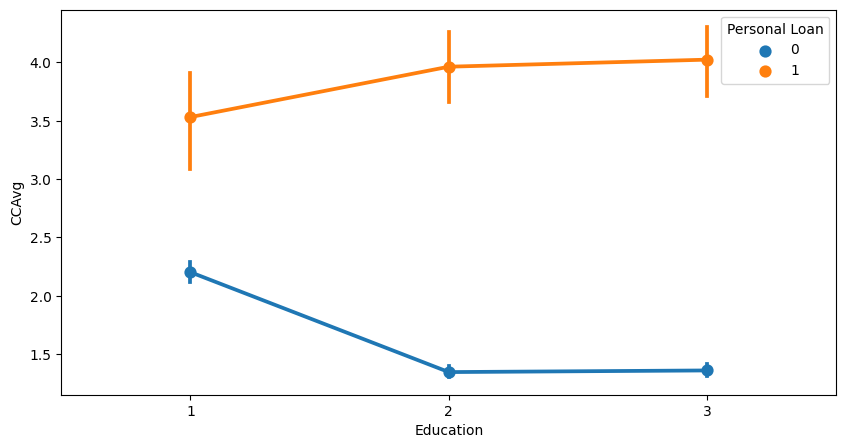

In [46]:
plt.figure(figsize=(10,5))
sns.pointplot(x="Education", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

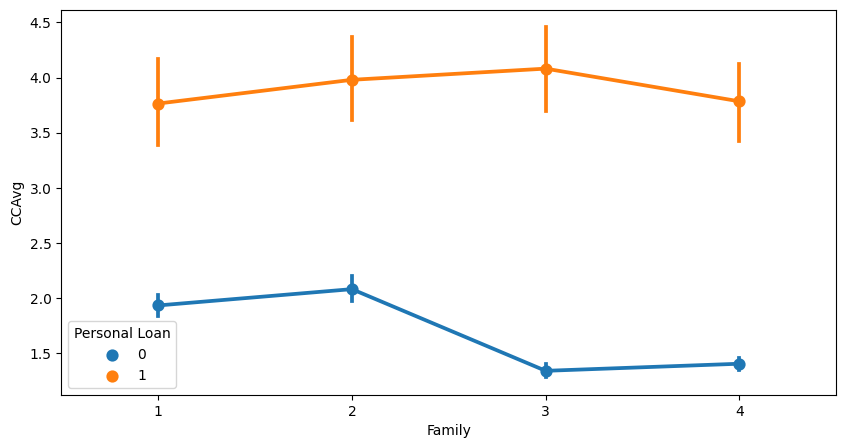

In [47]:
plt.figure(figsize=(10,5))
sns.pointplot(x="Family", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

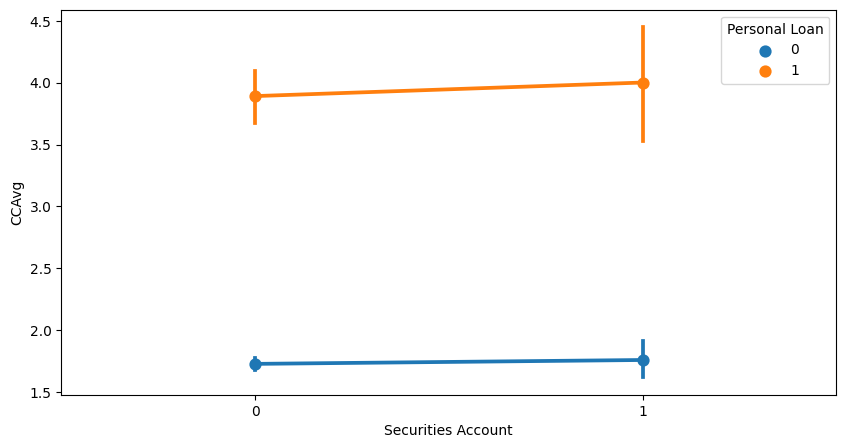

In [48]:
plt.figure(figsize=(10,5))
sns.pointplot(x="Securities Account", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

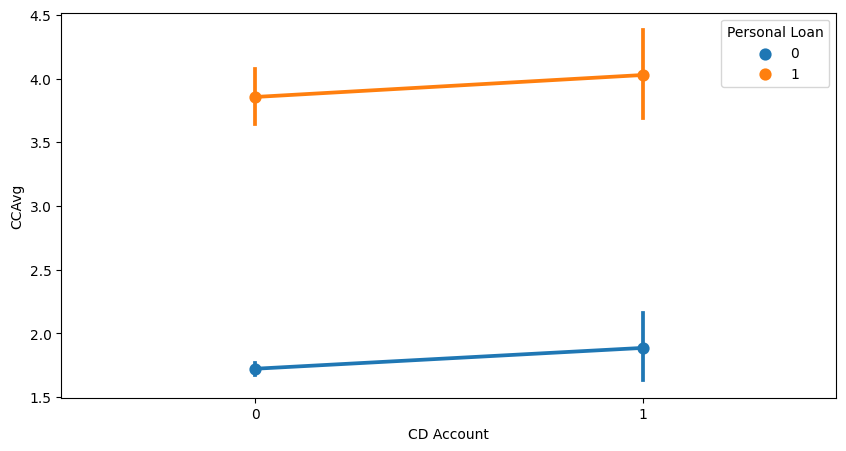

In [49]:
plt.figure(figsize=(10,5))
sns.pointplot(x="CD Account", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

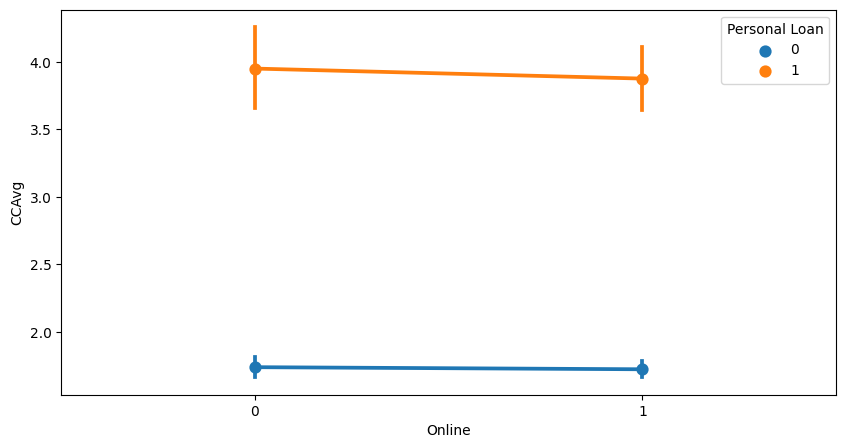

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x="Online", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

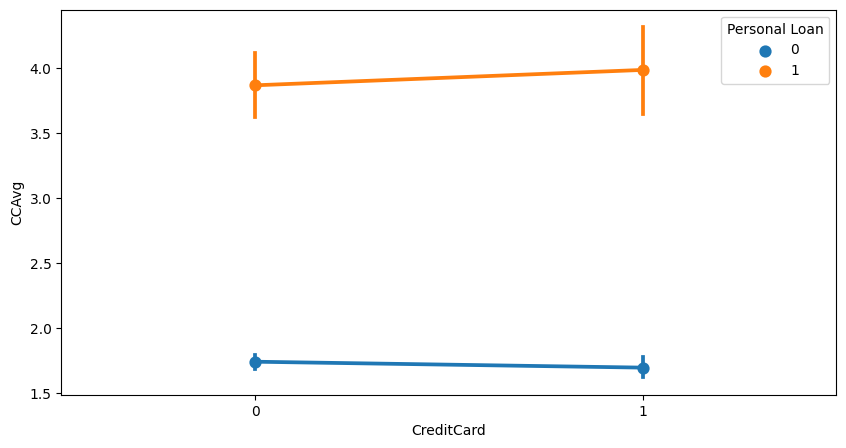

In [51]:
plt.figure(figsize=(10,5))
sns.pointplot(x="CreditCard", y="CCAvg", hue = 'Personal Loan',  data=df)
plt.show()

# target variable imbalance checking

In [52]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

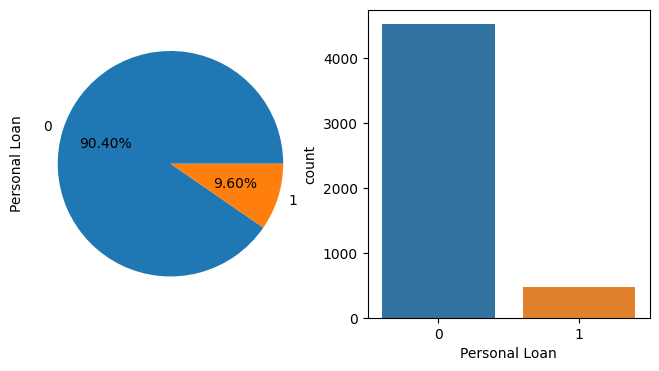

In [53]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
df['Personal Loan'].value_counts().plot.pie(autopct = '%0.2f%%',ax=ax[0])
sns.countplot(x = 'Personal Loan', data=df,ax = ax[1])
plt.show()

### There is huge imbalance in target variable.

### If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

### A widely adopted technique for dealing with highly unbalanced datasets is called resampling

### Two widely used resampling methods:

### Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

### Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

### Here we will use oversampling because undersampling may remove important information from the dataset

# outlier handling
Income CCAvg and Mortgae has outliers

In [54]:
col = ["Income", "CCAvg", "Mortgage"]

In [55]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in Income Before Imputing : 96


 Mean of Income is 71


 Total Number of outliers in Income After Imputing : 0


 Total Number of outliers in CCAvg Before Imputing : 324


 Mean of CCAvg is 1


 Total Number of outliers in CCAvg After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




# Checking on Target Imbalance

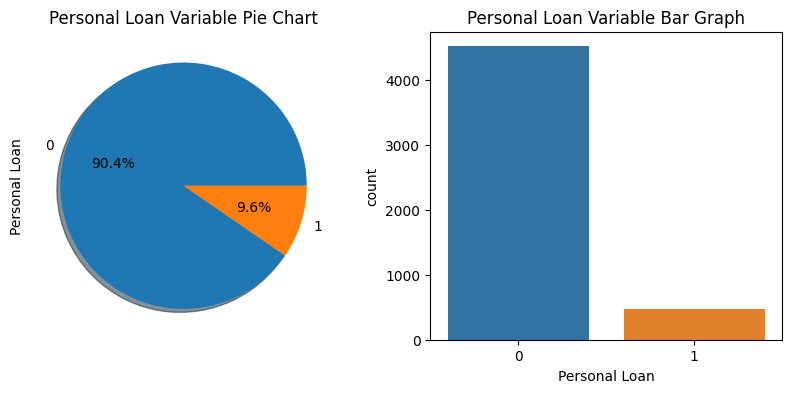

In [56]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df['Personal Loan'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(x = 'Personal Loan',data=df,ax=axes[1],order=[0,1])
axes[0].set_title('Personal Loan Variable Pie Chart')
axes[1].set_title('Personal Loan Variable Bar Graph')
plt.show()

There is huge imbalance in target variable.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model.

A widely adopted technique for dealing with highly unbalanced datasets is called resampling

Two widely used resampling methods:

Undersampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

Oversampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

Here we will use oversampling because undersampling may remove important information from the dataset

In [57]:
def detect_outliers_iqr(df,feature):
    '''returns outliers of the feature'''
    feature_outliers = []
    
    q25 = np.percentile(df[feature], 25)
    q75 = np.percentile(df[feature], 75)
    
    IQR = q75-q25
    lwr_tail = q25 - (1.5*IQR)
    upr_tail = q75 + (1.5*IQR)
    
    for i in df[feature]: 
        if (i < lwr_tail or i > upr_tail):
            feature_outliers.append(i)

    result = feature_outliers 
    return result

In [58]:
len(detect_outliers_iqr(df,'CCAvg'))

139

In [59]:
from scipy import stats

z_a = stats.zscore(df['CCAvg'])

outliers1 = []
for i in z_a:
    if abs(i)>3:    # 3 is threshold value wgich can be adjusted
        outliers1.append(i)
print(len(outliers1))

22


In [60]:
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# model
    training without oversampling 

In [61]:
X = df.drop(columns='Personal Loan')
y = df['Personal Loan']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [63]:
lr = LogisticRegression()
svm = SVC()
nb = GaussianNB()

In [64]:
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [67]:
lr.score(X_train,y_train)

0.9414285714285714

In [68]:
lr.score(X_test,y_test)

0.9333333333333333

In [69]:
cm = confusion_matrix(y_test,y_pred)
cm                                # 79 and 21 are errors FN and FP

array([[1322,   21],
       [  79,   78]], dtype=int64)

In [70]:
df_cm = pd.DataFrame(cm, index=['0 (Non loan holder)','1 (Loan holder)'], columns=['0 (Non loan holder)','1 (Loan holder)'])

In [71]:
df_cm                             # 79 and 21 are errors FN and FP

0 (Non loan holder)  1 (Loan holder)
0 (Non loan holder)                 1322               21
1 (Loan holder)                       79               78

<Axes: >

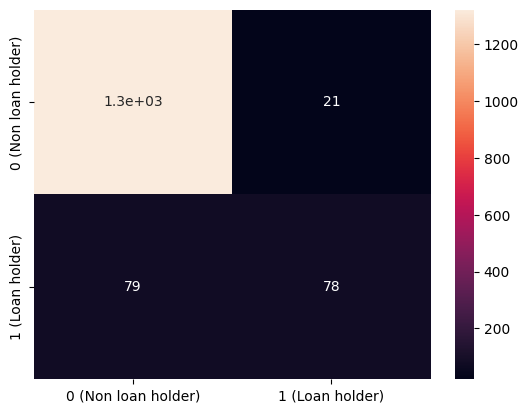

In [72]:
sns.heatmap(df_cm, annot=True)                       # 79 and 21 are errors FN and FP respectively

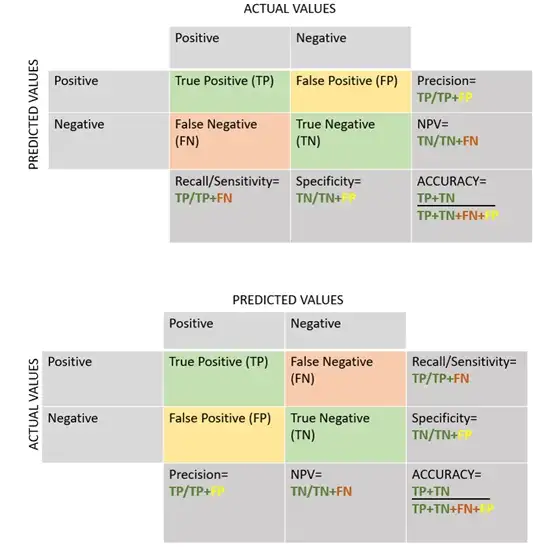

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1343
           1       0.79      0.50      0.61       157

    accuracy                           0.93      1500
   macro avg       0.87      0.74      0.79      1500
weighted avg       0.93      0.93      0.93      1500



In [74]:
# Here Recall tells that only 50% class 1 is predicted correctly from actual values.
# We dont have enough sample of class 1 to train the model.
# We will do the sampling and check how recall value improves in this case.
# we need to improve recall .recall is the metric we are tracking because it gives FN. 
# FN are customers that accepted loan but our model is labeling them as not accepted.FN is type 2 error
# We need to reduce recall FN.
# FN means bank marketing wont't target true potential customers because our model is labeling them as 'loan not accepted'. 
# We need to reduce recall number so that maximum potential customers can be targeted and profit can be increased and overall success of marketing campaign, coversion from depositors to borrowers can be achieved

In [75]:
# without resampling we get high recall now we try with resampling to make target balanced

## SMOTE
- Synthetic Minority Over-sampling Technique for Nominal and Continuous.

Unlike SMOTE, SMOTE-NC for dataset containing numerical and categorical features. However, it is not designed to work with only categorical features.

In [76]:
df.head(2)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0

In [77]:
smote_nc = SMOTENC(categorical_features= [6,10,11], random_state=42)

In [78]:
X_s,y_s = smote_nc.fit_resample(X,y)  # doing SMOTE on entire dataset without train test split

In [79]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0    4520
1     480
Name: Personal Loan, dtype: int64


In [80]:
print('After sampling:')
print(y_s.value_counts())    # target is balanced after sampling

After sampling:
0    4520
1    4520
Name: Personal Loan, dtype: int64


In [81]:
# training model on oversampled data

X_train,X_test,y_train,y_test = train_test_split(X_s,y_s,test_size=0.30,random_state=True)

In [82]:
lr = LogisticRegression()

In [83]:
lr.fit(X_train,y_train)

LogisticRegression()

In [84]:
y_pred = lr.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred)

0.8528761061946902

In [86]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1141,  209],
       [ 190, 1172]], dtype=int64)

In [87]:
df_cm = pd.DataFrame(cm)
df_cm

0     1
0  1141   209
1   190  1172

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1350
           1       0.85      0.86      0.85      1362

    accuracy                           0.85      2712
   macro avg       0.85      0.85      0.85      2712
weighted avg       0.85      0.85      0.85      2712



In [89]:
# we can see recall is improved after balancing the target var by using oversampling

-    **Now we can see recall value is improved after sampling.
    So whenever we have imbalance target we will use sampling method to balance the data.
    If we do smote on entire data it may leak information to validation data as well.
    we need to test the model with unseen information. so we will do sampling only on training data.
    we are doing smote only for training data**

## SMOTE on training data only

In [90]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=True)

In [91]:
X_train.shape, y_train.shape

((3500, 13), (3500,))

In [92]:
smote_nc = SMOTENC(categorical_features=[6,10,11],random_state=True)

In [93]:
X_s, y_s = smote_nc.fit_resample(X_train, y_train) # doing SMOTE on training dataset only

In [94]:
lr = LogisticRegression()

In [95]:
lr.fit(X_s,y_s)

LogisticRegression()

In [96]:
y_pred = lr.predict(X_test)

In [97]:
lr.score(X_test,y_test)

0.828

In [98]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1118,  233],
       [  25,  124]], dtype=int64)

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1351
           1       0.35      0.83      0.49       149

    accuracy                           0.83      1500
   macro avg       0.66      0.83      0.69      1500
weighted avg       0.92      0.83      0.86      1500

